# Spam message classifier

*by Maniteja Vallala, Tarun Sai Pamulapati December 12, 2023*



## Introduction

Prediction of spam messages has been an important area of research for a long time. The misuse of electronic messaging networks to send a lot of unsolicited messages to anyone is called spam. Spam messages are used to disseminate phishing URLs and commercial advertisements. Emails and text messages differ from one another in a few important ways. Since text messages are shorter in length than emails, there are also much less criteria available for categorizing text messages than emails. Moreover, text messages are jam-packed with acronyms and employ far less formal language than emails. These factors collectively have the potential to significantly reduce the efficacy of the current spam message filtering systems.

We are interested in libraries like NumPy, Pandas, Scikitlearn, Matplotlib  and various classification algorithms. In addition to supporting huge, multi-dimensional arrays and matrices, NumPy offers a range of sophisticated mathematical functions for effective array operations. For working with structured data, Pandas offers user-friendly data structures and operations. This makes it a vital tool for data transformation, cleaning, and analysis. scikit-learn is a widely used and well-documented library that provides a broad range of tools and algorithms for machine learning tasks. Matplotlib provides various features to visualise data from various perspectives, which makes it easier for the users to decide on how to consider the feature set.

We are going to use the dataset which contains data related to spam or ham messages. We are going to perform classification task on that data to predict whether a message is spam or not. We will be performing classification using different classifiers such as K nearest neghbours, decision tree classifer, support vector machine, Naive Bayes classifier by tuning the hyper parameters and we will be evaluating performance of different models using evaluation metrics. Apart from these, we would also be applying the neural network as suggested by Professor, and compare the correctness with the above mentioned different classification methods. Finally we will develop a web interface and the model will be integrated to that. When a message is provided as an input, the prediction will be displayed.


## Methods

We are going to use Spam / Ham SMS dataset from Kaggle which contains the around 5500 messages along with ground truth labels (ham/spam). The dataset downloaded from kaggle is in Comma Seperated Values format (CSV) [1]. NumPy is a Python library used for working with arrays [2]. Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language [3]. Pandas read_csv() function imports a CSV file to DataFrame format [4]. So we use pandas package to import and read the dataset. Since the file is in "latin1" encoding, we are using 'ISO-8859-1' parameter while reading.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_sms=pd.read_csv(".\sms_spam.csv", encoding='ISO-8859-1')

In [3]:
df_sms.sample(5)

,type,text
5208,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
3207,ham,"Better than bb. If he wont use it, his wife wi..."
2539,ham,I'm home.
924,ham,Goodnight da thangam I really miss u dear.
2597,ham,I could ask carlos if we could get more if any...


In [4]:
df_sms.shape

(5559, 2)

There are two columns namely type and text. Type column contains either ham or spam value and text column contains messages. Spam indicates that the corresponding text is a spam message. Ham indicates that the corresponding message is not a spam message. Above data frame (df_sms) display 5 samples in the considered dataset. There are total 5559 rows with two columns in the dataset.

As a part of this project, we are going to perform below tasks:

1. Cleaning the data
2. Exploratory Data Analysis
3. Text preprocessing
4. Developing the classification model
5. Evaluating results obtained from classification model
6. Creating a simple webpage and deploying the model in that

__Step 1: Cleaning the data__

In the data cleansing step, we will be checking if there are any NULL values or duplicate values (if any), and we will be dropping that data, as it might be of no use instead it might create outliers in the model.

In [5]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [6]:
df_sms.isnull().sum()

type    0
text    0
dtype: int64

From the above two code cells, it is evident that total number of Values in both column 1 (type) and column 2 (text) are same and there are no null values present in those two columns. Next we will be converting the type values from string into integer values. If the value is ham we will assign 0 for that, for spam we will assign 1.

In [7]:
df_sms['type'] = df_sms['type'].replace({'ham': 0, 'spam': 1})

In [8]:
df_sms.sample(5)

,type,text
5513,1,CDs 4u: Congratulations ur awarded Â£500 of CD...
2063,1,Dear U've been invited to XCHAT. This is our f...
657,0,It is only yesterday true true.
3215,0,Please da call me any mistake from my side sor...
3939,1,1st wk FREE! Gr8 tones str8 2 u each wk. Txt N...


The above sample data represents how the data looks after replacing the strings with their corresponding integer values. As a part of next step, we will be removing duplicate values present in the text column.

In [9]:
df_sms.duplicated().sum()

403

In [10]:
df_final = df_sms.drop_duplicates(subset='text')

There are total 403 duplicate values in the text column and we are removing them.

In [11]:
df_final.duplicated().sum()

0

In [12]:
df_final.shape

(5156, 2)

In [13]:
df_final.head()

,type,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or Â£10,000..."
4,1,okmail: Dear Dave this is your final notice to...


After removing the duplicate values, we ahve total 5156 rows with columns.

__Step 2: Exploratory Data Analysis__

Once the data cleaning is done, in order to understand the data, we will be performing exploratory data analysis. We will tokenize the messages to count the number of words, characters, and sentences. We are going to perform the above operations to analyze the difference between ham and spam messages. We will use different visualizations to analyze different kinds of messages. Moreover, we will be finding correlations between different features.

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible [5]. Matplotlib can be used for various purposes such as:
1. Creating publication quality plots
2. Making interactive figures that can zoom, pan, update
3. Customizing visual style and layout
4. Exporting to many file formats

matplotlib.pyplot is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager [6].

In [14]:
import matplotlib.pyplot as plot

In [15]:
df_final['type'].value_counts()

0    4503
1     653
Name: type, dtype: int64

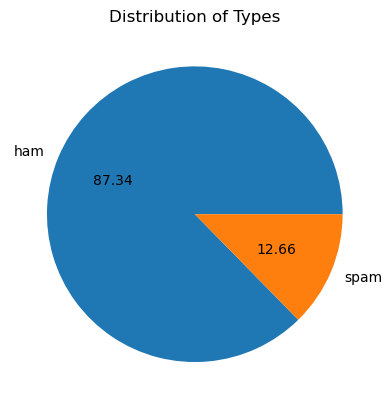

In [16]:
type_counts = df_final['type'].value_counts()
labels = ['ham', 'spam']

plot.pie(type_counts, labels=labels, autopct="%0.2f")
plot.title('Distribution of Types')
plot.show()

From the above code cells, it is evident that out of 5156 messages, 4503 messages are ham (87.34%) and 653 meesages are spam (12.66%). Moreover, from the piechart we can say that there is slight imbalance in the dataset because there are more number of ham messages than spam messages.

In order to tokenize the messages for counting the number of words, characters, and sentences, we need regular expression. SO we will be importing that module.

In [17]:
import re
df_final['text'].head(5)

0    Hope you are having a good week. Just checking in
1                              K..give back my thanks.
2          Am also doing in cbe only. But have to pay.
3    complimentary 4 STAR Ibiza Holiday or Â£10,000...
4    okmail: Dear Dave this is your final notice to...
Name: text, dtype: object

In [18]:
def clean_and_count(sentences):
    # We will remove repetitions of '.', '!', or '?'
    cleaned_sentences = re.sub(r'([.!?])\1+', r'\1', sentences)

    # Breaking the cleaned sentences into an array
    sentence_array = re.split(r'[.!?]', cleaned_sentences)

    # Removing empty strings from the array generated by converting cleaned sentence into an array.
    sentence_array = [sentence.strip() for sentence in sentence_array if sentence.strip()]

    # Counting the number of sentences from sentence_array
    sentence_count = len(sentence_array)
    
    # Splitting sentences into words
    words = re.findall(r'\b\w+\b', cleaned_sentences)

    # Counting the number of words
    word_count = len(words)

    # We will be returning the count of sentences and words in a message
    return sentence_count, word_count

We will use clean_count function for removing repitions of '.', '!', or '?', breaking the cleaned sentences into an array, removing empty strings from the array generated by converting cleaned sentence into an array and to count the number of sentences and words in the given message.

In [19]:
df_final = df_final.copy()
df_final[['sentences_count', 'words_count']] = df_final['text'].apply(clean_and_count).apply(pd.Series)

We are applying clean_and_count function to each message in the 'text' column of df_final dataframe. As the function returns sentences and word count, we will be appending that to the df_fianl dataframe.

In [20]:
df_final['characters_count']=df_final['text'].apply(len)

The above code calculates the length of each message in the 'text' column using the len function and assigns the result to a new column named 'characters_count' in the dataFrame df_final.

In [21]:
df_final.head()

,type,text,sentences_count,words_count,characters_count
0,0,Hope you are having a good week. Just checking in,2,10,49
1,0,K..give back my thanks.,2,5,23
2,0,Am also doing in cbe only. But have to pay.,2,10,43
3,1,"complimentary 4 STAR Ibiza Holiday or Â£10,000...",3,23,150
4,1,okmail: Dear Dave this is your final notice to...,3,27,161


After adding 3 columns the resulting dataframe looks like this.

In [22]:
df_final[['sentences_count', 'words_count', 'characters_count']].describe()

,sentences_count,words_count,characters_count
count,5156.000000,5156.00000,5156.000000
mean,2.308766,15.95384,78.768425
std,1.637488,11.42975,57.709698
min,1.000000,0.00000,2.000000
25%,1.000000,7.00000,35.000000
50%,2.000000,12.00000,60.000000
75%,3.000000,23.00000,118.000000
max,31.000000,190.00000,910.000000


The above data represents descriptive statistics for three columns sentences_count, words_count and characters_count in the dataframe for both spam and ham messages. Here is the brief description of each of them:

__1. Count__: Count simply indicates the number of data points in the dataset. It represents the size or length of the dataset.
   There are total 5156 entries in sentences_count, words_count and characters_count column.
   
__2. Mean (Average)__: The mean, or average, is the sum of all values in a dataset divided by the number of values. It is a 
    measure of central tendency and provides an estimate of the "typical" value. On an average there can be approximately 2.3 sentences, 15.95 words and 78.77 characters in a message.
    
__3. Standard Deviation (std)__: The standard deviation is a measure of the amount of variation or dispersion in a set of values. A    higher standard deviation indicates greater variability from the mean. The standard deviation for 
    sentences_count is around 1.63, for words_count it is 11.42 and 57.70 for characters.
    
__4. Minimum (min)__: The minimum is the smallest value in the dataset, representing the lowest observed value. The minimum number of sentences in a text is 1. The minimum number of words in a text is 0 (this might be a special case or a potential issue in the data). The minimum number of characters in a text is 2.
    
__5. 25th Percentile (25%)__: The 25th percentile, or first quartile, is the value below which 25% of the data falls. It is a measure of the data's spread in the lower range. 25% of the data falls below 1 sentence, 7 words and 35 characters.
    
__6. Median (50%)__: The median is the middle value in a sorted dataset. It divides the data into two equal halves, with 50% of 
the data falling below and 50% above. It is also known as the second quartile. For sentences_count, the median is 2, meaning     50% of the data has 2 sentences or fewer. For words_count, 50% of the data has 12 words or fewer. In characters_count 50% of     the data has 60 characters or fewer.
    
__7. 75th Percentile (75%)__: The 75th percentile, or third quartile, is the value below which 75% of the data falls. It is a 
measure of the data's spread in the upper range. 75% of the data falls below 3 sentences, 23 words and  118 characters.
    
__8. Maximum (max)__: The maximum is the largest value in the dataset, representing the highest observed value. The maximum number of sentences that can be present in the message for the considered dataset are 31. The highest number of words are 190 and highest number of characters are 910.

In [23]:
df_final[df_final['type']==0][['sentences_count', 'words_count', 'characters_count']].describe()

,sentences_count,words_count,characters_count
count,4503.000000,4503.000000,4503.000000
mean,2.103042,14.546302,70.166556
std,1.506995,11.335266,55.671015
min,1.000000,0.000000,2.000000
25%,1.000000,7.000000,33.000000
50%,2.000000,11.000000,52.000000
75%,3.000000,19.000000,91.000000
max,31.000000,190.000000,910.000000


The above data represents descriptive statistics for three columns sentences_count, words_count and characters_count in the dataframe for ham messages. Here is the brief description of each of them:

__1. Count__: There are total 4503 entries in sentences_count, words_count and characters_count column.

__2. Mean (Average)__: On an average there can be approximately 2.1 sentences, 14.54 words and 70.16 characters in a message.

__3. Standard Deviation (std)__: The standard deviation for sentences_count is around 1.50, for words_count it is 11.33 and 55.67 for characters.

__4. Minimum (min)__: The minimum number of sentences in a text is 1. The minimum number of words in a text is 0 (this might be a special case or a potential issue in the data). The minimum number of characters in a text is 2.

__5. 25th Percentile (25%)__: 25% of the data falls below 1 sentence, 7 words and 33 characters.

__6. Median (50%)__: For sentences_count, the median is 2, meaning 50% of the data has 2 sentences or fewer. For words_count, 50% of the data has 11 words or fewer. In characters_count 50% of the data has 52 characters or fewer.

__7. 75th Percentile (75%)__: 75% of the data falls below 3 sentences, 19 words and 91 characters.

__8. Maximum (max)__: The maximum number of sentences that can be present in the message for the considered dataset are 31. The highest number of words are 190 and highest number of characters are 910.

In [24]:
df_final[df_final['type']==1][['sentences_count', 'words_count', 'characters_count']].describe()

,sentences_count,words_count,characters_count
count,653.000000,653.000000,653.000000
mean,3.727412,25.660031,138.085758
std,1.791887,6.136300,29.943331
min,1.000000,2.000000,13.000000
25%,2.000000,24.000000,132.000000
50%,4.000000,27.000000,149.000000
75%,5.000000,29.000000,157.000000
max,10.000000,40.000000,224.000000


The above data represents descriptive statistics for three columns sentences_count, words_count and characters_count in the dataframe for spam messages. Here is the brief description of each of them:

__1. Count__: There are total 653 entries in sentences_count, words_count and characters_count column.

__2. Mean (Average)__: On an average there can be approximately 3.7 sentences, 25.6 words and 138.08 characters in a message.

__3. Standard Deviation (std)__: The standard deviation for sentences_count is around 1.79, for words_count it is 6.13 and 29.94 for characters.

__4. Minimum (min)__: The minimum number of sentences in a text is 1. The minimum number of words in a text is 2 (this might be a special case or a potential issue in the data). The minimum number of characters in a text is 13.

__5. 25th Percentile (25%)__: 25% of the data falls below 2 sentence, 24 words and 132 characters.

__6. Median (50%)__: For sentences_count, the median is 4, meaning 50% of the data has 4 sentences or fewer. For words_count, 50% of the data has 27 words or fewer. In characters_count 50% of the data has 149 characters or fewer.

__7. 75th Percentile (75%)__: 75% of the data falls below 5 sentences, 29 words and 157 characters.

__8. Maximum (max)__: The maximum number of sentences that can be present in the message for the considered dataset are 10. The highest number of words are 40 and highest number of characters are 224.

We can observe that spam message are bigger than ham messages in terms of characters words and sentences used. We can see that by plotting histogram.

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics [7]. We will be using seabron to plot histograms.

In [25]:
import seaborn as sbrn

Text(0.5, 1.0, 'Histogram for Characters Count')

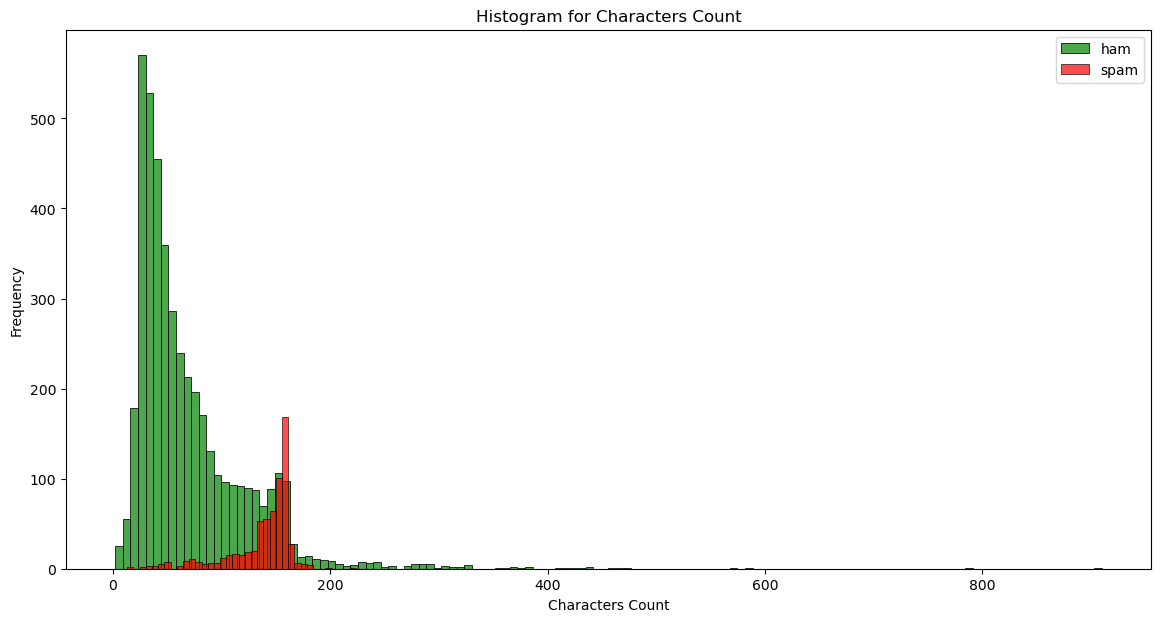

In [26]:
plot.figure(figsize=(14,7))
sbrn.histplot(df_final[df_final['type']==0]['characters_count'],color='green',label='ham', alpha=0.7)
sbrn.histplot(df_final[df_final['type']==1]['characters_count'],color='red',label='spam', alpha=0.7)
plot.legend()
plot.xlabel('Characters Count')
plot.ylabel('Frequency')
plot.title('Histogram for Characters Count')

In the above histogram, green represents ham messages and red represents spam messages. We can observe that there are less number of characters in ham messages. Whereas there are more number of characters for spam messages.

Text(0.5, 1.0, 'Histogram for Words Count')

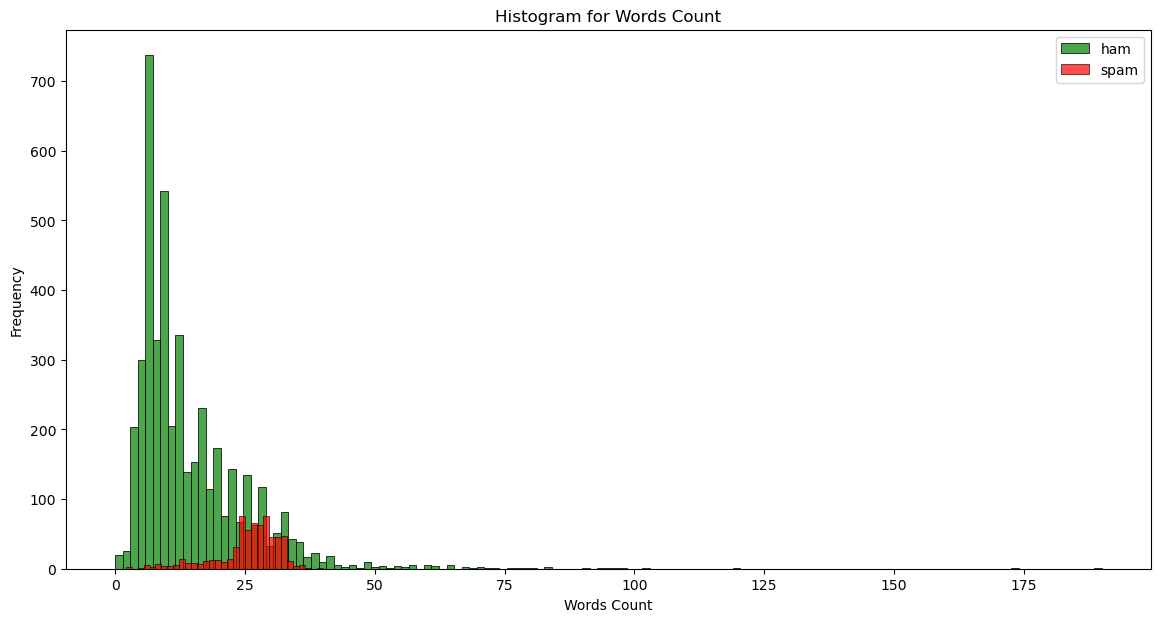

In [27]:
plot.figure(figsize=(14,7))
sbrn.histplot(df_final[df_final['type']==0]['words_count'],color='green',label='ham', alpha=0.7)
sbrn.histplot(df_final[df_final['type']==1]['words_count'],color='red',label='spam', alpha=0.7)
plot.legend()
plot.xlabel('Words Count')
plot.ylabel('Frequency')
plot.title('Histogram for Words Count')

From the above histogram, we can say that on an average thre are more number of words in spam messages than ham messages.

Text(0.5, 1.0, 'Histogram for Sentences Count')

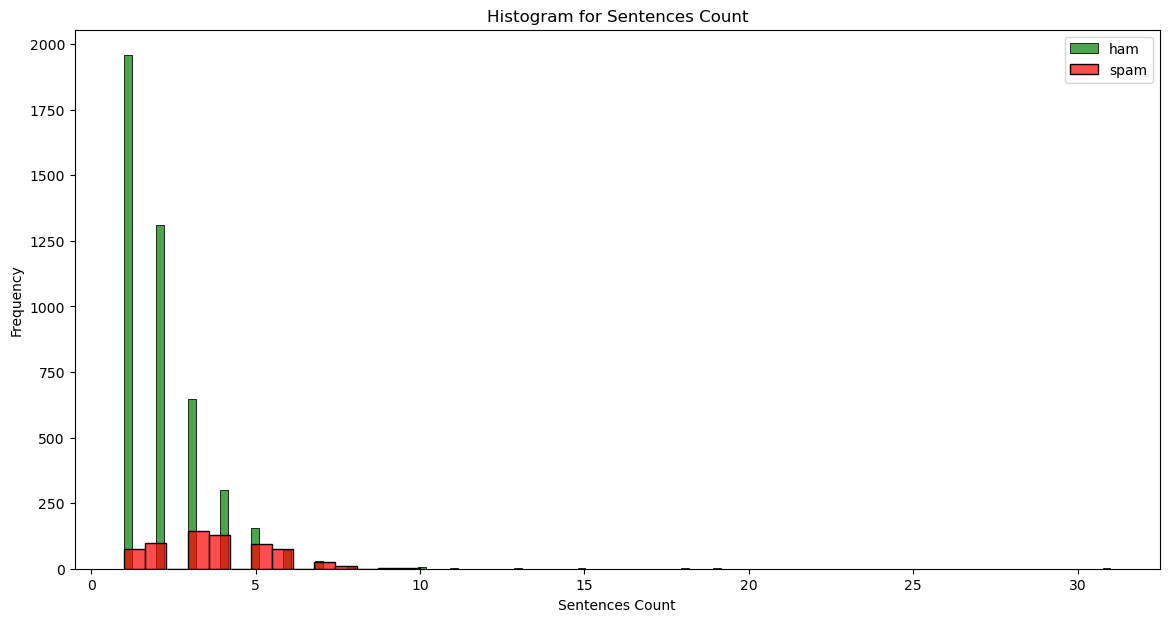

In [28]:
plot.figure(figsize=(14,7))
sbrn.histplot(df_final[df_final['type']==0]['sentences_count'],color='green',label='ham', alpha=0.7)
sbrn.histplot(df_final[df_final['type']==1]['sentences_count'],color='red',label='spam', alpha=0.7)
plot.legend()
plot.xlabel('Sentences Count')
plot.ylabel('Frequency')
plot.title('Histogram for Sentences Count')

The above histogram is for the count of sentences for spam and ham messages.

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure [8]. We will be using this to generate the pair wise relationship netween spam and ham messages.

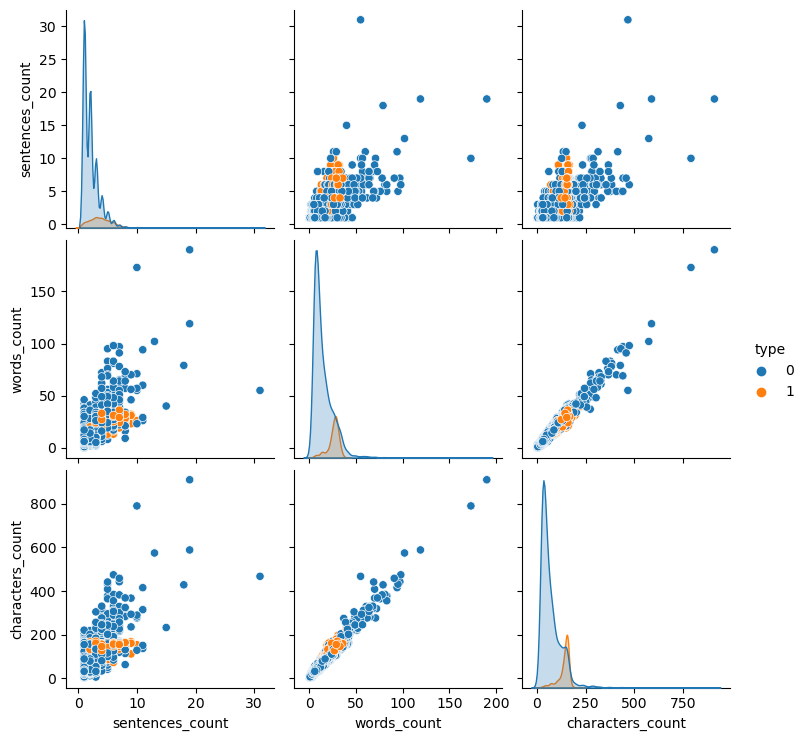

In [29]:
sbrn.pairplot(df_final,hue='type')

The scatter plot shows the relationship between the number of characters in a sentence and the number of words in that sentence. The data points are clustered around a diagonal line, which suggests that there is a positive correlation between the two variables. This means that, as the number of characters in a sentence increases, the number of words in that sentence also tends to increase.

The graph also shows that there is a lot of variation in the data. This is because sentences can vary in length and complexity, even if they have the same number of characters. For example, a sentence with a lot of punctuation or abbreviations will have more characters than a sentence with the same number of words but without any punctuation or abbreviations.

Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred. Heatmap is also defined by the name of the shading matrix. Heatmaps in Seaborn can be plotted by using the seaborn.heatmap() function [9].

<AxesSubplot:>

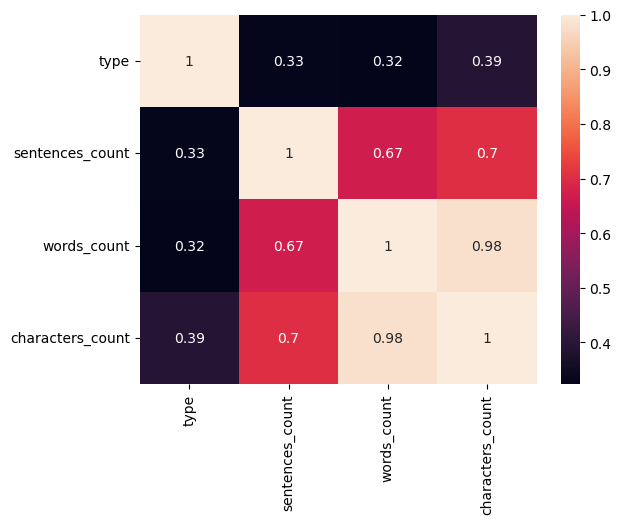

In [30]:
sbrn.heatmap(df_final[['type','sentences_count','words_count','characters_count']].corr(),annot=True)

From the above heatamp, we can obeserve that the correlation between type and characters count is 0.39, which means when there are more number of characters, it will be spam message. Moreover there is good correlation between (characters_count,sentences_count), (words_count, sentences_count) and (characters_count, words_count) .

__Step 3: Data Preprocessing__

We are going to find the top words that are being used in spam and ham messages. In order to find that, we are going to do data preprocessing. First we will convert the messages into lower case. Next we will tokenize the message into array of words. Next we will remove special characters, stop words and punctuations since they won't contribute to the meaning of the actual sentence. Next we will be performing stemming to reduce words to their base or root form. Then we will be generating a corpus of words for spam and ham to find which are the most commonly used words.

NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning .

NLTK Tokenizers divide strings into lists of substrings. The NLTK data package also includes a number of lexicons and word lists which can be utilized to work woth stop words [10]. The Porter stemming algorithm (or ‘Porter stemmer’) is a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems [11]. This can be used to reduce words to their base or root form.

We will be using nltk package in our program, to perform data preprocessing.

In [31]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def data_preprocessing(message):
    #We are converting message into lowercase
    message=message.lower()
    #We are tokenizing the message into array of words
    message=word_tokenize(message)
    data=[]
    
    for i in message:
        #the below line removes any characters from i that are not alphanumeric
        result=re.sub(r'[^a-zA-Z0-9\s]', '', i)
        if(result!=""):
            data.append(result)
    
    text=data[:]
    data.clear()
    
    for j in text:
        #For each value in text, we will check for stopwords and special characters.
        if j not in stopwords.words('english') and j not in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~':
            data.append(j)
    
    text=data[:]
    data.clear()
    
    #We are performing stemming
    for k in text:
        result=porter.stem(k)
        if(result):
            data.append(result)
    
    return " ".join(data)

In [32]:
df_final['processed_text']=df_final['text'].apply(data_preprocessing)

Here we are applying data preprocessing on each message present in the text column. We will be storing messages in processed_text column of df_final dataframe

In [33]:
df_final.head()

,type,text,sentences_count,words_count,characters_count,processed_text
0,0,Hope you are having a good week. Just checking in,2,10,49,hope good week check
1,0,K..give back my thanks.,2,5,23,k give back thank
2,0,Am also doing in cbe only. But have to pay.,2,10,43,also cbe pay
3,1,"complimentary 4 STAR Ibiza Holiday or Â£10,000...",3,23,150,complimentari 4 star ibiza holiday 10000 cash ...
4,1,okmail: Dear Dave this is your final notice to...,3,27,161,okmail dear dave final notic collect 4 tenerif...


All the messages are copnverted to their root form. Above are the few examples present in processed_text column.

Word cloud is one of the most powerful and straightforward visualization methods when it comes to text data. The size of words are dependent on the occurrence frequency [12]. Words having more frequency will be bigger in size and the words having less frequency will be smaller in size.

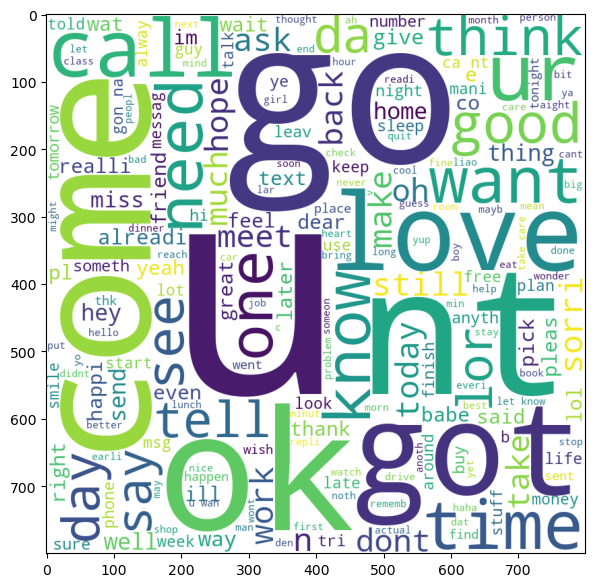

In [34]:
#for ham messages
from wordcloud import WordCloud
ham_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(df_final[df_final['type']==0]['processed_text'].str.cat(sep=" "))
plot.figure(figsize=(7, 7))
plot.imshow(ham_wordcloud)

The above word cloud corresponds to words in ham messages. The words in large size are used in most of the messages. Based on their frequency, their size changes. The above word cloud is for ham messages. Some of most occuring words are u,come,go,got,love,ok etc.

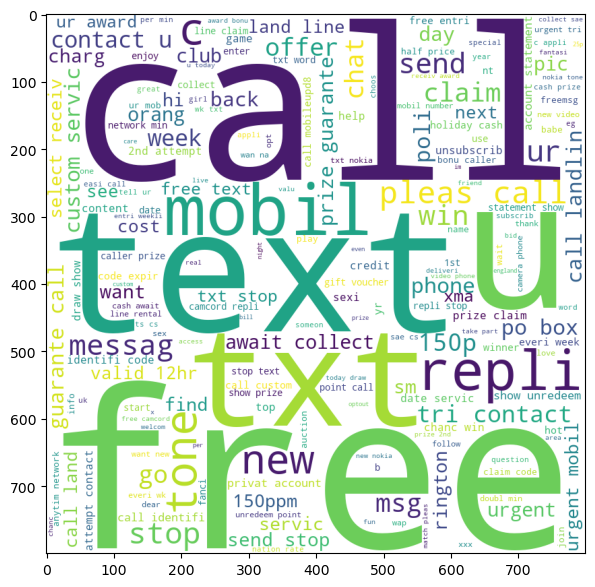

In [35]:
#for spam messages
from wordcloud import WordCloud
spam_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(df_final[df_final['type']==1]['processed_text'].str.cat(sep=" "))
plot.figure(figsize=(7, 7))
plot.imshow(spam_wordcloud)

The above word cloud corresponds to words in spam messages. The words in large size are used in most of the messages. Based on their frequency, their size changes. Few examples are free, call, text, u, txt etc. 

Next we will create plots to display top 30 most frequently occuring owrds for both spam and ham messgaes

In [36]:
ham_words=[]
for message in df_final[df_final['type']==0]['processed_text'].tolist():
    for word in message.split():
        ham_words.append(word)
        
# Calculating word frequencies using a dictionary
word_counts = {}
for word in ham_words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Sorting the dictionary by values (frequencies) in decreasing order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

Using the code in the above cell, we will calculate the word frequencies using a dictionary and we will sort the dictionary by frequencies. Above fucntion is for ham messages.

In [37]:
ham_df = pd.DataFrame(list(sorted_word_counts.items()), columns=['word', 'frequency'])

We are creating a data frame using the results generated from previous code cells.

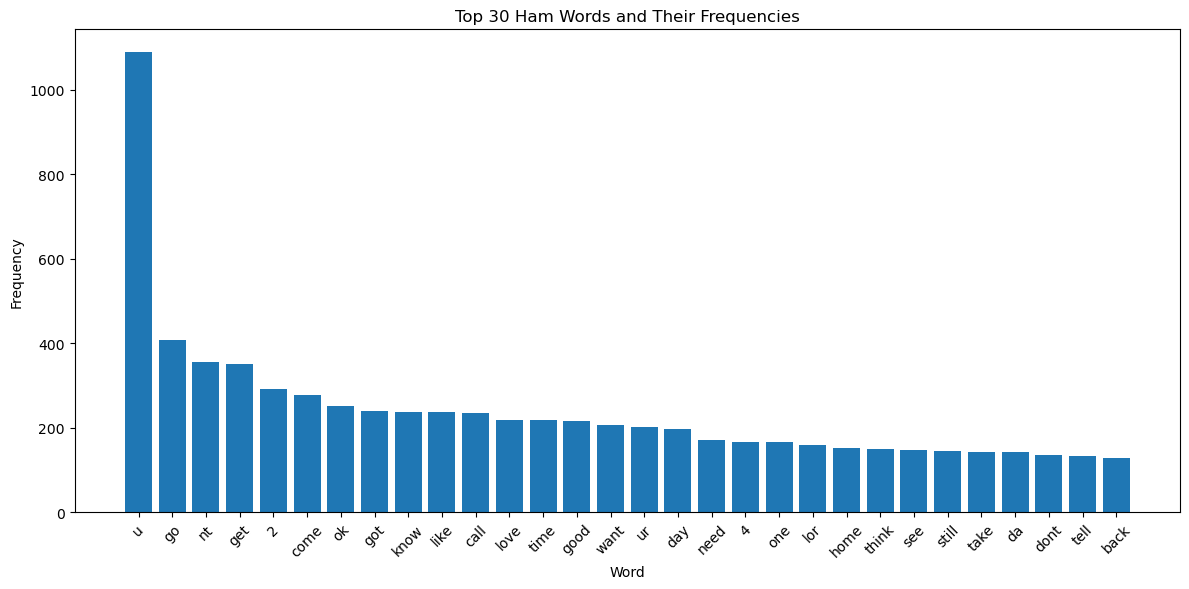

In [38]:
ham_df_30=ham_df.head(30)
plot.figure(figsize=(12, 6))
plot.bar(ham_df_30['word'], ham_df_30['frequency'])
plot.xlabel('Word')
plot.ylabel('Frequency')
plot.title('Top 30 Ham Words and Their Frequencies')
plot.xticks(rotation=45)  # Rotating x-axis labels by 45 degrees to fit all names.
plot.tight_layout()  # Adjusting layout to prevent clipping of labels
plot.show()

The above plot represents top 30 words in ham messages and their frequencies.

In [39]:
spam_words=[]
for message in df_final[df_final['type']==1]['processed_text'].tolist():
    for word in message.split():
        spam_words.append(word)
        
# Calculating word frequencies using a dictionary
word_counts = {}
for word in spam_words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Sort the dictionary by values (frequencies) in decreasing order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

Using the code in the above cell, we will calculate the word frequencies using a dictionary and we will sort the dictionary by frequencies. Above fucntion is for spam messages.

In [40]:
spam_df = pd.DataFrame(list(sorted_word_counts.items()), columns=['word', 'frequency'])

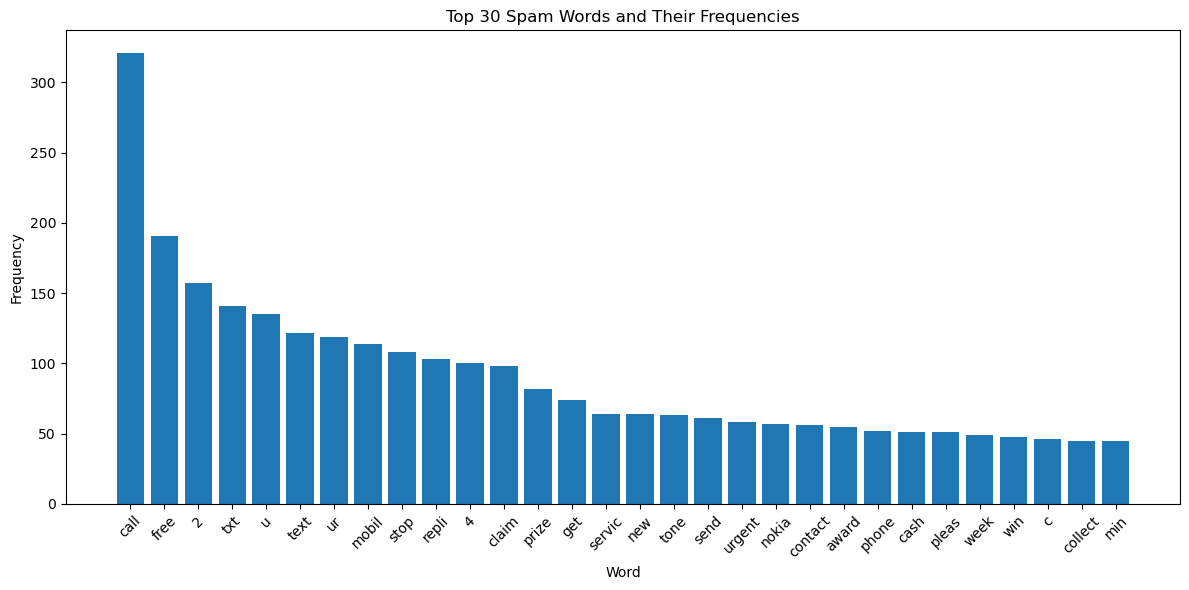

In [41]:
spam_df_30=spam_df.head(30)
plot.figure(figsize=(12, 6))
plot.bar(spam_df_30['word'], spam_df_30['frequency'])
plot.xlabel('Word')
plot.ylabel('Frequency')
plot.title('Top 30 Spam Words and Their Frequencies')
plot.xticks(rotation=45)  # Rotate x-axis labels for better readability
plot.tight_layout()  # Adjust layout to prevent clipping of labels
plot.show()

The above plot represents top 30 words in spam messages and their frequencies.

__Step 4: Developing the classification model__

We will be performing classification using different classifiers such as Naive Bayes, K nearest neighbors, decision tree classifier, support vector machine, neural networks etc. by tuning the hyperparameters and we will be evaluating them using evaluation metrics such as accuracy, precision. After finding the best classifiers, we will try to combine the predictions of multiple best-performing machine learning models to make a final model.

Input for the model will be processed_text and the output will be type of the message. Since input is not numerical, we are going to convert text into vectors. For that we will be using two types of vectorization methods namely Count Vectorization and TF-IDF vectorization methods. We will apply vectorization methods on processed data we will choose the best one out of two methods. These two methods are most popular methods for converting textual data into numerical vectors.

We are going to use Naive Bayes algorithm to choose the vectorization method. The Naïve Bayes classifier is a supervised machine learning algorithm, which is used for classification tasks, like text classification. It is also part of a family of generative learning algorithms, meaning that it seeks to model the distribution of inputs of a given class or category. 

Machines cannot understand characters and words. So when dealing with text data we need to represent it in numbers to be understood by the machine. 

Count vectorizer is a method to convert text to numerical data. The text is transformed to a sparse matrix. It first preprocesses the text by removing stop words, punctuation and stemming or lemmatizing words. Then it creates a vocabulary of all unique words across the entire corpus. And for each document, it creates a vector where each element represents the number of times that word appears in the document.

Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support-vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy [14]. We will be using scikit-learn to import Count Vectorization and TFIDF Vectorization.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

cVectorizer = CountVectorizer()
X = cVectorizer.fit_transform(df_final['processed_text']).toarray()

In [43]:
X.shape

(5156, 7605)

In [44]:
y=df_final['type'].values

In [45]:
# Setting the random seed for reproducibility
np.random.seed(2)
# Generating random indices for splitting
indices = np.arange(len(X))
np.random.shuffle(indices)
# Calculating the indexes for splitting (80% train, 20% test)
split_index = int(0.8 * len(X))
# Splitting the data into train and test
X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]

In the above code we are setting seed to ensure that though we execute code multiple times, same set of random numbers are generated each time.

We will be using three types in Naive Bayes. They are Gaussian Naive Bayes, Multinomial Naive Bayes, Bernoulli Naive Bayes.

__1. Gaussian Naive Bayes__: Gaussian Naive Bayes is a classification technique used in machine learning based on the probabilistic approach and Gaussian distribution [15].

__2. Multinomial Naive Bayes__:Multinomial Naive Bayes classifier is suitable for classification with discrete features [16].

__3. Bernoulli Naive Bayes__: Bernoulli Naive Bayes is a subcategory of the Naive Bayes Algorithm. It is used for the classification of binary features such as ‘Yes’ or ‘No’, ‘1’ or ‘0’, ‘True’ or ‘False’ etc [17].

In [51]:
def confusion_matrix(Y_classes, T):
    class_names = np.unique(T)
    table = []
    for true_class in class_names:
        row = []
        for Y_class in class_names:
            row.append(100 * np.mean(Y_classes[T == true_class] == Y_class))
        table.append(row)
    conf_matrix = pd.DataFrame(table, index=class_names, columns=class_names)
    print('Percent Correct')
    return conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f}")

In [52]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [56]:
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print('Accuracy for Gaussian Naive Bayes is::',accuracy_score(y_test,y_pred_gnb))
print('Precision score for Gaussian Naive Bayes is::',precision_score(y_test,y_pred_gnb))

Accuracy for Gaussian Naive Bayes is:: 0.873062015503876
Precision score for Gaussian Naive Bayes is:: 0.4611872146118721


In [57]:
confusion_matrix(y_test,y_pred_gnb)

Percent Correct


,0,1
0,98.4,1.6
1,53.9,46.1


We are using Gaussian Naive Bayes classifier in the above code. We are getting 87% accuracy abd 46% precision.

In [58]:
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)
print('Accuracy for multinomial Naive Bayes is::',accuracy_score(y_test,y_pred_mnb))
print('Precision score for multinomial Naive Bayes is ::',precision_score(y_test,y_pred_mnb))

Accuracy for multinomial Naive Bayes is:: 0.9699612403100775
Precision score for multinomial Naive Bayes is :: 0.8487394957983193


In [60]:
confusion_matrix(y_test,y_pred_mnb)

Percent Correct


,0,1
0,98.6,1.4
1,15.1,84.9


We are using Multinomial Naive Bayes classifier in the above code. We are getting 98% accuracy abd 84% precision.

In [62]:
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)
print('Accuracy for Bernoulli Naive Bayes is::',accuracy_score(y_test,y_pred_bnb))
print('Precision score for Bernoulli Naive Bayes is::',precision_score(y_test,y_pred_bnb))

Accuracy for Bernoulli Naive Bayes is:: 0.9738372093023255
Precision score for Bernoulli Naive Bayes is:: 0.978021978021978


In [63]:
confusion_matrix(y_test,y_pred_bnb)

Percent Correct


,0,1
0,97.3,2.7
1,2.2,97.8


We are using Bernoulli Naive Bayes in the above code. We are getting 97% accuracy and 97% precision.

Now we will implement TFIDF vectorizer. TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction [18]. It first preprocesses the text similarly to count vectorization and then calculated the term frequency(TF) for each word in each document. Then we calculate the Inverse Document Frequency (IDF) and multiply TF and IDF for each word in each document to obtain the TF-IDF weight and create a vector for each document where each element represents the TF-IDF weight of the corresponding word.

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X1 = tfidf.fit_transform(df_final['processed_text']).toarray()

In [65]:
X1.shape

(5156, 7605)

In [66]:
y1=df_final['type'].values

In [67]:
y1.shape

(5156,)

In [170]:
# Setting the random seed for reproducibility
np.random.seed(2)
# Generating random indices for splitting
indices = np.arange(len(X1))
np.random.shuffle(indices)
# Calculating the indexes for splitting (80% train, 20% test)
split_index = int(0.8 * len(X1))
# Splitting the data into train and test
X_train, X_test = X1[indices[:split_index]], X1[indices[split_index:]]
y_train, y_test = y1[indices[:split_index]], y1[indices[split_index:]]

In [71]:
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print('Accuracy for Gaussian Naive Bayes classifier is ::',accuracy_score(y_test,y_pred_gnb))
print('Precision score for Gaussian Naive Bayes classifier is::',precision_score(y_test,y_pred_gnb))

Accuracy for Gaussian Naive Bayes classifier is :: 0.872093023255814
Precision score for Gaussian Naive Bayes classifier is:: 0.4583333333333333


In [72]:
confusion_matrix(y_test,y_pred_gnb)

Percent Correct


,0,1
0,98.2,1.8
1,54.2,45.8


We are using Gaussian Naive Bayes classifier in the above code. We are getting 87% accuracy abd 45% precision.

In [73]:
mnb.fit(X_train,y_train)
y_pred_mnb_1=mnb.predict(X_test)
print('Accuracy for Multinomial Naive Bayes is::',accuracy_score(y_test,y_pred_mnb_1))
print('Precision score Multinomial Naive Bayes is::',precision_score(y_test,y_pred_mnb_1))

Accuracy for Multinomial Naive Bayes is:: 0.9660852713178295
Precision score Multinomial Naive Bayes is:: 1.0


In [74]:
confusion_matrix(y_test,y_pred_mnb_1)

Percent Correct


,0,1
0,96.3,3.7
1,0.0,100.0


We are using Multinomial Naive Bayes classifier in the above code. We are getting 96% accuracy abd 100% precision which is good when compared to previous precision.

In [76]:
bnb.fit(X_train,y_train)
y_pred_bnb_1=bnb.predict(X_test)
print('Accuracy for Bernoulli Naive Bayes is::',accuracy_score(y_test,y_pred_bnb_1))
print('Precision score for Bernoulli Naive Bayes is::',precision_score(y_test,y_pred_bnb_1))

Accuracy for Bernoulli Naive Bayes is:: 0.9738372093023255
Precision score for Bernoulli Naive Bayes is:: 0.978021978021978


In [77]:
confusion_matrix(y_test,y_pred_bnb_1)

Percent Correct


,0,1
0,97.3,2.7
1,2.2,97.8


We are using Bernoulli Naive Bayes in the above code. We are getting 97% accuracy and 97% precision. 

When compared with all three different classifiers, good accuracy and precision were seen using TF IDF vectorization. For Bernoulli and Gaussian there wasn't that much of a different but, for Multinomial TF_IDF has proved to be the best when comapred to both hence, we will going forward with that. 

Now we will be trying with different models such as:

__1. Logistic Regression__: Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables [19]. 

__2. XGB Classifier__: XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework [20].

__3. Support Vector Machines__: Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection [21].

__4. K Nearest Neighbors Classifier__: The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point [22].

__5. Random Forest Classifier__: A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting [23]. 

__6. Decision Tree Classifier__: Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features [24]. 

__7. Gradient Boosting Classifier__: Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, i.e., models that make very few assumptions about the data, which are typically simple decision trees [25].

__8. Extra Trees Classifier__: ExtraTreesClassifier is an ensemble learning method fundamentally based on decision trees. ExtraTreesClassifier, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting [26].

__9. Bagging Classifier__: A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction [27].

__10. AdaBoost Classifier__: An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases [28].

__11. Multinomial Naive Bayes__: Multinomial Naive Bayes classifier is suitable for classification with discrete features [16].

We will consider different hyper parameters for classifiers and we will check for accuracy and precision values. Finally we will consider hyper parameters for models so that they give good accuracy and precision. 

In [78]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

In [135]:
classifiers={
    'LogisticRegression' : lr,
    'XGBClassifier' : xgbclassifier,
    'SVC' : svclassifier,
    'KNeighborsClassifier' : knclassifier,
    'RandomForestClassifier' : rdfclassifier,
    'DecisionTreeClassifier' : dtclassifier,
    'GradientBoostingClassifier' : gbclassifier,
    'ExtraTreesClassifier' : etclassifier,
    'BaggingClassifier' : bclassifier,
    'AdaBoostClassifier' : abclassifier,
    'MultinomialNB' : mnclassifier
}

test 1

In [79]:
lr=LogisticRegression(solver='liblinear', penalty='l1')
xgbclassifier=XGBClassifier(n_estimators=50,random_state=2)
svclassifier=SVC(kernel='sigmoid', gamma=1.0)
knclassifier=KNeighborsClassifier()
rdfclassifier=RandomForestClassifier(n_estimators=50, random_state=2)
dtclassifier=DecisionTreeClassifier(max_depth=5)
gbclassifier=GradientBoostingClassifier(n_estimators=50, random_state=2)
etclassifier=ExtraTreesClassifier(n_estimators=50, random_state=2)
bclassifier=BaggingClassifier(n_estimators=50, random_state=2)
abclassifier=AdaBoostClassifier(n_estimators=50, random_state=2)
mnclassifier=MultinomialNB()

In [173]:
def classifiers_training(classifier,X_train,y_train,X_test,y_test):
    classifier.fit(X_train,y_train)
    y_prediction=classifier.predict(X_test)
    precision=precision_score(y_test,y_prediction)
    accuracy=accuracy_score(y_test,y_prediction)
    return accuracy,precision

In [82]:
acuuracy_values=[]
precision_values=[]
for name,classifier in classifiers.items():
    acc,prec=classifiers_training(classifier,X_train,y_train,X_test,y_test)
    acuuracy_values.append(acc)
    precision_values.append(prec)
    print(name, acc, prec)

LogisticRegression 0.9554263565891473 0.8953488372093024
XGBClassifier 0.9777131782945736 0.989247311827957
SVC 0.9757751937984496 0.9587628865979382


C:\Users\manit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.9147286821705426 1.0
RandomForestClassifier 0.9738372093023255 1.0
DecisionTreeClassifier 0.9457364341085271 0.9142857142857143
GradientBoostingClassifier 0.9612403100775194 0.9743589743589743
ExtraTreesClassifier 0.9767441860465116 0.96875
BaggingClassifier 0.9709302325581395 0.92
AdaBoostClassifier 0.9641472868217055 0.9139784946236559
MultinomialNB 0.9660852713178295 1.0


In [83]:
df_classifiers=pd.DataFrame({'Algorithm': classifiers.keys(),'Accuracy': acuuracy_values, 'Precision': precision_values}).sort_values(by=['Precision','Accuracy'], ascending=False)

In [84]:
df_classifiers

,Algorithm,Accuracy,Precision
4,RandomForestClassifier,0.973837,1.000000
10,MultinomialNB,0.966085,1.000000
3,KNeighborsClassifier,0.914729,1.000000
1,XGBClassifier,0.977713,0.989247
6,GradientBoostingClassifier,0.961240,0.974359
7,ExtraTreesClassifier,0.976744,0.968750
2,SVC,0.975775,0.958763
8,BaggingClassifier,0.970930,0.920000
5,DecisionTreeClassifier,0.945736,0.914286
9,AdaBoostClassifier,0.964147,0.913978


In the above codem we have sent data into different classifiers, we have generated accuracy and precision values for each of them. We are storing them into a dataframe and we are sorting them based on accuracy and precision values in decreasing order.

test 2 - where we are providing high value for the n_estimators and reducing the value for random_states to 1

In [86]:
lr=LogisticRegression(solver='saga', penalty='l2')
xgbclassifier=XGBClassifier(n_estimators=200,random_state=1)
svclassifier=SVC(kernel='linear', gamma=10)
knclassifier=KNeighborsClassifier(weights='uniform')
rdfclassifier=RandomForestClassifier(n_estimators=200, random_state=1)
dtclassifier=DecisionTreeClassifier(max_depth=10)
gbclassifier=GradientBoostingClassifier(n_estimators=200, random_state=1)
etclassifier=ExtraTreesClassifier(n_estimators=200, random_state=2, max_depth=10)
bclassifier=BaggingClassifier(n_estimators=200, random_state=1)
abclassifier=AdaBoostClassifier(n_estimators=200, random_state=1,learning_rate=0.01)
mnclassifier=MultinomialNB()

In [88]:
acuuracy_values=[]
precision_values=[]
for name,classifier in classifiers.items():
    acc,prec=classifiers_training(classifier,X_train,y_train,X_test,y_test)
    acuuracy_values.append(acc)
    precision_values.append(prec)
    print(name, acc, prec)

LogisticRegression 0.9534883720930233 0.9583333333333334
XGBClassifier 0.9728682170542635 0.9574468085106383
SVC 0.9767441860465116 0.96875


C:\Users\manit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.9147286821705426 1.0
RandomForestClassifier 0.9728682170542635 0.9886363636363636
DecisionTreeClassifier 0.9651162790697675 0.9333333333333333
GradientBoostingClassifier 0.9651162790697675 0.975609756097561
ExtraTreesClassifier 0.8963178294573644 1.0
BaggingClassifier 0.9748062015503876 0.9489795918367347
AdaBoostClassifier 0.9040697674418605 0.8947368421052632
MultinomialNB 0.9660852713178295 1.0


In [89]:
df_classifiers=pd.DataFrame({'Algorithm': classifiers.keys(),'Accuracy': acuuracy_values, 'Precision': precision_values}).sort_values(by=['Precision','Accuracy'], ascending=False)
df_classifiers

,Algorithm,Accuracy,Precision
10,MultinomialNB,0.966085,1.000000
3,KNeighborsClassifier,0.914729,1.000000
7,ExtraTreesClassifier,0.896318,1.000000
4,RandomForestClassifier,0.972868,0.988636
6,GradientBoostingClassifier,0.965116,0.975610
2,SVC,0.976744,0.968750
0,LogisticRegression,0.953488,0.958333
1,XGBClassifier,0.972868,0.957447
8,BaggingClassifier,0.974806,0.948980
5,DecisionTreeClassifier,0.965116,0.933333


test 3

In [92]:
lr=LogisticRegression(solver='lbfgs', penalty='l2')
xgbclassifier=XGBClassifier(base_score=0.5,n_estimators=50,random_state=10, learning_rate=0.01)
svclassifier=SVC(kernel='sigmoid', gamma=3.0)
knclassifier=KNeighborsClassifier(algorithm='kd_tree')
rdfclassifier=RandomForestClassifier(n_estimators=50, random_state=10,max_features='log2')
dtclassifier=DecisionTreeClassifier(criterion='entropy',splitter='random')
gbclassifier=GradientBoostingClassifier(loss='exponential',n_estimators=50, random_state=10)
etclassifier=ExtraTreesClassifier(criterion='entropy', n_estimators=50, random_state=10)
bclassifier=BaggingClassifier(n_estimators=50, random_state=10)
abclassifier=AdaBoostClassifier(n_estimators=50, random_state=10)
mnclassifier=MultinomialNB()

In [94]:
acuuracy_values=[]
precision_values=[]
for name,classifier in classifiers.items():
    acc,prec=classifiers_training(classifier,X_train,y_train,X_test,y_test)
    acuuracy_values.append(acc)
    precision_values.append(prec)
    print(name, acc, prec)

LogisticRegression 0.9534883720930233 0.9583333333333334
XGBClassifier 0.9496124031007752 0.918918918918919
SVC 0.9631782945736435 0.8454545454545455


C:\Users\manit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.9147286821705426 1.0
RandomForestClassifier 0.9670542635658915 1.0
DecisionTreeClassifier 0.9602713178294574 0.8476190476190476
GradientBoostingClassifier 0.939922480620155 0.9814814814814815
ExtraTreesClassifier 0.9777131782945736 0.9789473684210527
BaggingClassifier 0.9728682170542635 0.9387755102040817
AdaBoostClassifier 0.9641472868217055 0.9139784946236559
MultinomialNB 0.9660852713178295 1.0


In [95]:
df_classifiers=pd.DataFrame({'Algorithm': classifiers.keys(),'Accuracy': acuuracy_values, 'Precision': precision_values}).sort_values(by=['Precision','Accuracy'], ascending=False)
df_classifiers

,Algorithm,Accuracy,Precision
4,RandomForestClassifier,0.967054,1.000000
10,MultinomialNB,0.966085,1.000000
3,KNeighborsClassifier,0.914729,1.000000
6,GradientBoostingClassifier,0.939922,0.981481
7,ExtraTreesClassifier,0.977713,0.978947
0,LogisticRegression,0.953488,0.958333
8,BaggingClassifier,0.972868,0.938776
1,XGBClassifier,0.949612,0.918919
9,AdaBoostClassifier,0.964147,0.913978
5,DecisionTreeClassifier,0.960271,0.847619


test 4

In [115]:
lr=LogisticRegression(penalty='elasticnet',solver='saga',C=0.5,l1_ratio=1)
xgbclassifier=XGBClassifier(booster='gbtree', objective='binary:logistic', learning_rate=0.02)
svclassifier=SVC(kernel='poly')
knclassifier=KNeighborsClassifier(n_neighbors = 80, algorithm='ball_tree',weights='distance',leaf_size=10)
rdfclassifier=RandomForestClassifier(n_estimators=200, random_state=12, criterion='entropy', min_samples_split=10)
dtclassifier=DecisionTreeClassifier(criterion='gini', max_depth=30)
gbclassifier=GradientBoostingClassifier(n_estimators=200, criterion = 'squared_error', learning_rate = 0.001)
etclassifier=ExtraTreesClassifier(criterion = 'entropy', n_estimators=300, max_depth=10)
bclassifier=BaggingClassifier(n_estimators=10, random_state=10)
abclassifier=AdaBoostClassifier(algorithm='SAMME',n_estimators=200, random_state=10)
bnbclassifier=BernoulliNB(fit_prior=False)

In [117]:
acuuracy_values=[]
precision_values=[]
for name,classifier in classifiers.items():
    acc,prec=classifiers_training(classifier,X_train,y_train,X_test,y_test)
    acuuracy_values.append(acc)
    precision_values.append(prec)
    print(name, acc, prec)

LogisticRegression 0.9418604651162791 0.8970588235294118
XGBClassifier 0.9583333333333334 0.9863013698630136
SVC 0.9253875968992248 1.0
KNeighborsClassifier 0.9331395348837209 0.9591836734693877
RandomForestClassifier 0.9738372093023255 0.9887640449438202
DecisionTreeClassifier 0.9670542635658915 0.9


C:\Users\manit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier 0.8895348837209303 0.0
ExtraTreesClassifier 0.8943798449612403 1.0
BaggingClassifier 0.9718992248062015 0.956989247311828
AdaBoostClassifier 0.9505813953488372 0.8888888888888888
MultinomialNB 0.9660852713178295 1.0


In [118]:
df_classifiers=pd.DataFrame({'Algorithm': classifiers.keys(),'Accuracy': acuuracy_values, 'Precision': precision_values}).sort_values(by=['Precision','Accuracy'], ascending=False)
df_classifiers

,Algorithm,Accuracy,Precision
10,MultinomialNB,0.966085,1.000000
2,SVC,0.925388,1.000000
7,ExtraTreesClassifier,0.894380,1.000000
4,RandomForestClassifier,0.973837,0.988764
1,XGBClassifier,0.958333,0.986301
3,KNeighborsClassifier,0.933140,0.959184
8,BaggingClassifier,0.971899,0.956989
5,DecisionTreeClassifier,0.967054,0.900000
0,LogisticRegression,0.941860,0.897059
9,AdaBoostClassifier,0.950581,0.888889


test 5

In [127]:
lr=LogisticRegression()
xgbclassifier=XGBClassifier()
svclassifier=SVC()
knclassifier=KNeighborsClassifier()
rdfclassifier=RandomForestClassifier()
dtclassifier=DecisionTreeClassifier()
gbclassifier=GradientBoostingClassifier()
etclassifier=ExtraTreesClassifier()
bclassifier=BaggingClassifier()
abclassifier=AdaBoostClassifier()
mnclassifier=MultinomialNB()

In [129]:
acuuracy_values=[]
precision_values=[]
for name,classifier in classifiers.items():
    acc,prec=classifiers_training(classifier,X_train,y_train,X_test,y_test)
    acuuracy_values.append(acc)
    precision_values.append(prec)
    print(name, acc, prec)

LogisticRegression 0.9534883720930233 0.9583333333333334
XGBClassifier 0.9777131782945736 0.989247311827957
SVC 0.9699612403100775 1.0


C:\Users\manit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.9147286821705426 1.0
RandomForestClassifier 0.9748062015503876 1.0
DecisionTreeClassifier 0.9622093023255814 0.8640776699029126
GradientBoostingClassifier 0.9641472868217055 0.9753086419753086
ExtraTreesClassifier 0.9748062015503876 0.9583333333333334
BaggingClassifier 0.9718992248062015 0.9292929292929293
AdaBoostClassifier 0.9641472868217055 0.9139784946236559
MultinomialNB 0.9660852713178295 1.0


In [130]:
df_classifiers=pd.DataFrame({'Algorithm': classifiers.keys(),'Accuracy': acuuracy_values, 'Precision': precision_values}).sort_values(by=['Precision','Accuracy'], ascending=False)
df_classifiers

,Algorithm,Accuracy,Precision
4,RandomForestClassifier,0.974806,1.000000
2,SVC,0.969961,1.000000
10,MultinomialNB,0.966085,1.000000
3,KNeighborsClassifier,0.914729,1.000000
1,XGBClassifier,0.977713,0.989247
6,GradientBoostingClassifier,0.964147,0.975309
7,ExtraTreesClassifier,0.974806,0.958333
0,LogisticRegression,0.953488,0.958333
8,BaggingClassifier,0.971899,0.929293
9,AdaBoostClassifier,0.964147,0.913978


test 6

In [134]:
lr=LogisticRegression(penalty='elasticnet',solver='saga',C=0.1,l1_ratio=0.5, class_weight='balanced')
xgbclassifier=XGBClassifier(n_estimators=500,random_state=50,max_depth=100, gamma=0.2)
svclassifier=SVC(kernel='linear', gamma=1.0,C=0.5)
knclassifier=KNeighborsClassifier(algorithm='brute',p=1)
rdfclassifier=RandomForestClassifier(n_estimators=500, random_state=5,max_depth=100, min_samples_leaf=10)
dtclassifier=DecisionTreeClassifier(max_depth=100,min_samples_leaf=25, min_samples_split=25)
gbclassifier=GradientBoostingClassifier(n_estimators=100, max_depth=10,min_samples_leaf=10, min_samples_split=10)
etclassifier=ExtraTreesClassifier(n_estimators=100, random_state=5, criterion='entropy', max_features='log2')
bclassifier=BaggingClassifier(n_estimators=300, random_state=50)
abclassifier=AdaBoostClassifier(n_estimators=300, random_state=25,algorithm='SAMME')
mnclassifier=MultinomialNB(fit_prior=False)

In [136]:
acuuracy_values=[]
precision_values=[]
for name,classifier in classifiers.items():
    acc,prec=classifiers_training(classifier,X_train,y_train,X_test,y_test)
    acuuracy_values.append(acc)
    precision_values.append(prec)
    print(name, acc, prec)

LogisticRegression 0.9292635658914729 0.6474820143884892
XGBClassifier 0.9748062015503876 0.9489795918367347
SVC 0.9689922480620154 0.9659090909090909


C:\Users\manit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.9147286821705426 1.0
RandomForestClassifier 0.9312015503875969 1.0
DecisionTreeClassifier 0.9496124031007752 0.8369565217391305
GradientBoostingClassifier 0.9767441860465116 0.9891304347826086
ExtraTreesClassifier 0.9748062015503876 1.0
BaggingClassifier 0.9738372093023255 0.9393939393939394
AdaBoostClassifier 0.9573643410852714 0.926829268292683
MultinomialNB 0.935077519379845 0.6496815286624203


In [137]:
df_classifiers=pd.DataFrame({'Algorithm': classifiers.keys(),'Accuracy': acuuracy_values, 'Precision': precision_values}).sort_values(by=['Precision','Accuracy'], ascending=False)
df_classifiers

,Algorithm,Accuracy,Precision
7,ExtraTreesClassifier,0.974806,1.000000
4,RandomForestClassifier,0.931202,1.000000
3,KNeighborsClassifier,0.914729,1.000000
6,GradientBoostingClassifier,0.976744,0.989130
2,SVC,0.968992,0.965909
1,XGBClassifier,0.974806,0.948980
8,BaggingClassifier,0.973837,0.939394
9,AdaBoostClassifier,0.957364,0.926829
5,DecisionTreeClassifier,0.949612,0.836957
10,MultinomialNB,0.935078,0.649682


After testing with different hyperparameters for different classifiers, below paramters are working better for the chosen classifiers

In [187]:
rdfclassifier=RandomForestClassifier(n_estimators=50, random_state=2)
mnclassifier=MultinomialNB()
knclassifier=KNeighborsClassifier(n_neighbors = 80, algorithm='ball_tree',weights='distance',leaf_size=10)
xgbclassifier=XGBClassifier(n_estimators=50,random_state=2)
gbclassifier=GradientBoostingClassifier(n_estimators=100, max_depth=10,min_samples_leaf=10, min_samples_split=10)
etclassifier=ExtraTreesClassifier(criterion='entropy', n_estimators=50, random_state=10)
svclassifier=SVC(kernel='linear', gamma=10)
bclassifier=BaggingClassifier(n_estimators=200, random_state=1)
dtclassifier=DecisionTreeClassifier(max_depth=10)
abclassifier=AdaBoostClassifier(n_estimators=50, random_state=2)
lr=LogisticRegression(solver='lbfgs', penalty='l2')

In [188]:
classifiers={
    'LogisticRegression' : lr,
    'XGBClassifier' : xgbclassifier,
    'SVC' : svclassifier,
    'KNeighborsClassifier' : knclassifier,
    'RandomForestClassifier' : rdfclassifier,
    'DecisionTreeClassifier' : dtclassifier,
    'GradientBoostingClassifier' : gbclassifier,
    'ExtraTreesClassifier' : etclassifier,
    'BaggingClassifier' : bclassifier,
    'AdaBoostClassifier' : abclassifier,
    'MultinomialNB' : mnclassifier
}

In [189]:
acuuracy_values=[]
precision_values=[]
for name,classifier in classifiers.items():
    acc,prec=classifiers_training(classifier,X_train,y_train,X_test,y_test)
    acuuracy_values.append(acc)
    precision_values.append(prec)
    print(name, acc, prec)

LogisticRegression 0.9534883720930233 0.9583333333333334
XGBClassifier 0.9777131782945736 0.989247311827957
SVC 0.9767441860465116 0.96875
KNeighborsClassifier 0.9331395348837209 0.9591836734693877
RandomForestClassifier 0.9738372093023255 1.0
DecisionTreeClassifier 0.9631782945736435 0.9318181818181818
GradientBoostingClassifier 0.9767441860465116 0.9891304347826086
ExtraTreesClassifier 0.9777131782945736 0.9789473684210527
BaggingClassifier 0.9748062015503876 0.9489795918367347
AdaBoostClassifier 0.9641472868217055 0.9139784946236559
MultinomialNB 0.9660852713178295 1.0


In [190]:
df_classifiers=pd.DataFrame({'Algorithm': classifiers.keys(),'Accuracy': acuuracy_values, 'Precision': precision_values}).sort_values(by=['Precision','Accuracy'], ascending=False)
df_classifiers

,Algorithm,Accuracy,Precision
4,RandomForestClassifier,0.973837,1.000000
10,MultinomialNB,0.966085,1.000000
1,XGBClassifier,0.977713,0.989247
6,GradientBoostingClassifier,0.976744,0.989130
7,ExtraTreesClassifier,0.977713,0.978947
2,SVC,0.976744,0.968750
3,KNeighborsClassifier,0.933140,0.959184
0,LogisticRegression,0.953488,0.958333
8,BaggingClassifier,0.974806,0.948980
5,DecisionTreeClassifier,0.963178,0.931818


The melt function is used to reshape or transform the DataFrame. The id_vars parameter specifies the column(s) that should be retained as identifier variables, and the other columns will be stacked. We are using "Algorithm" column in id_vars.

In [191]:
df1_classifiers=pd.melt(df_classifiers, id_vars="Algorithm")
df1_classifiers

,Algorithm,variable,value
0,RandomForestClassifier,Accuracy,0.973837
1,MultinomialNB,Accuracy,0.966085
2,XGBClassifier,Accuracy,0.977713
3,GradientBoostingClassifier,Accuracy,0.976744
4,ExtraTreesClassifier,Accuracy,0.977713
5,SVC,Accuracy,0.976744
6,KNeighborsClassifier,Accuracy,0.933140
7,LogisticRegression,Accuracy,0.953488
8,BaggingClassifier,Accuracy,0.974806
9,DecisionTreeClassifier,Accuracy,0.963178


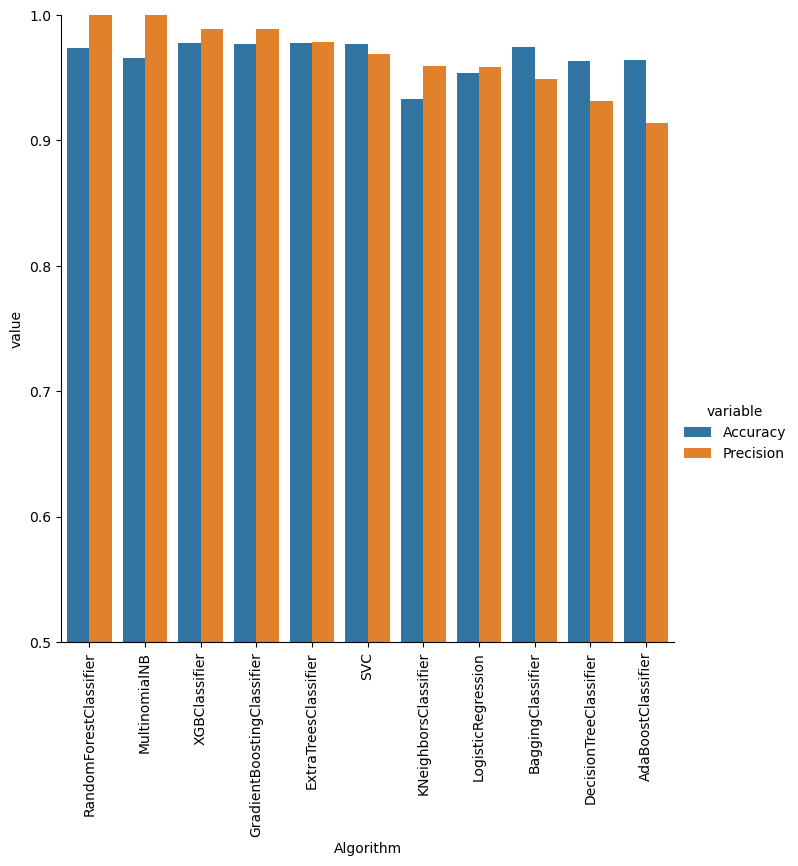

In [192]:
sbrn.catplot(x='Algorithm', y='value', hue='variable', data=df1_classifiers, kind='bar', height=7)
plot.ylim(0.5,1.0)
plot.xticks(rotation='vertical')
plot.show()

Above graphs representes the different algorithms that we have used wiith their accuracy and precision.

Next we are going to use voting classifier. A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class. There are two types of votings such as hard voting and soft voting. We will using soft voting where the output class is the prediction based on the average of probability given to that class [29].

We will be using top models which are giving good accuracy and precision values and try to increase precision and accuracy. We will use Gradient Boosting Classsifier, Random Forest, XGBClassifier and ExtraTreesClassifier.

In [194]:
mnclassifier=MultinomialNB()
xgbclassifier=XGBClassifier(n_estimators=50,random_state=2)
gbclassifier=GradientBoostingClassifier(n_estimators=100, max_depth=10,min_samples_leaf=10, min_samples_split=10)
etclassifier=ExtraTreesClassifier(criterion='entropy', n_estimators=50, random_state=10)
rdfclassifier=RandomForestClassifier(n_estimators=50, random_state=2)

In [218]:
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('RandomForestClassifier',rdfclassifier),
                                    #('MultinomialNB',mnclassifier),
                                    ('XGBClassifier',xgbclassifier),
                                    ('GradientBoostingClassifier',gbclassifier),
                                    ('ExtraTreesClassifier',etclassifier),
                                    ],voting='soft')

In [219]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('RandomForestClassifier',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=No...
                                            min_child_weight=None, missing=nan,
                                            monotone_const

In [220]:
y_prediction=voting.predict(X_test)
print("Accuracy of voting classifier: ",accuracy_score(y_test,y_prediction))
print("Precision of voting classifier: ",precision_score(y_test,y_prediction))

Accuracy of voting classifier:  0.9796511627906976
Precision of voting classifier:  0.9894736842105263


By ensembling Random Forest, XGBoost, Gradient Boosting, and Extra Trees models into a voting classifier, we achieved 97.9% accuracy on our dataset. This exceeds the individual accuracy of each constituent model. Voting classifiers operate by aggregating the predictions from multiple models, harnessing each one's strengths to improve overall performance. 

In our case, some component models had 100% precision, while others had lower precision scores. Our voting classifier was able to leverage the high precision models to achieve strong precision itself. At 97.9%, our voting classifier also obtained better accuracy than any individual model alone. 

Ensembling allows us to produce a more robust and accurate predictor compared to using any single model. As we have demonstrated, bringing together diverse, high-performing models via a voting classifier can boost overall predictive performance on key metrics like accuracy and precision. Our voting classifier leverages the strengths of Random Forest, XGBoost, Gradient Boosting, and Extra Trees to achieve state-of-the-art results on our dataset.

So we need to save model as well as the tf-idf vectorizaton that we have created above because we will be deploying in the webpage that we are going to create as a part of next step. In order to save them, we will be using pickle package. Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What Pickle does is it “serializes” the object first before writing it to a file [30]. 

In [221]:
import pickle
pickle.dump(voting,open('model.pkl','wb'))

Saving the voting model as voting.pkl file

In [222]:
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

Saving the tfidf into tfidf.pkl file

Now let's try the dataset with the neural networks. We have implemented the neural networks class in the class for A4, and we will be using the same as per professor instructed. We split the dataset into train, test and validation and then run the neural net on the train anad validation dataset and with the help of test data, we come to the correctness provided by the neural network which can be helpful in comparing with the other sklearn modules.

In [140]:
%load_ext autoreload
%autoreload 2

import neuralnetworksA4 as nn

In [141]:
from sklearn.model_selection import train_test_split

# Get the total number of samples
n_samples = X1.shape[0]

# Calculate the sizes of each split
n_train = int(n_samples * 0.6)
n_val = int(n_samples * 0.3)
n_test = n_samples - n_train - n_val

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=n_test, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=n_test/(n_val+n_test), random_state=42)
print(X_train.shape, X_test.shape, y_train.reshape(-1,1).shape, y_test.reshape(-1,1).shape,X_val.shape, y_val.reshape(-1,1).shape)

(4639, 7605) (130, 7605) (4639, 1) (130, 1) (387, 7605) (387, 1)


In [142]:
nnet = nn.NeuralNetworkClassifier(X1.shape[1], [10], 2)

In [143]:
nnet.train(X_train, y_train, X_val, y_val, n_epochs=10, method='adam', learning_rate=0.1)
print(nnet)

Adam: Epoch 1 Likelihood= Train 0.70711 Validate 0.70711
Adam: Epoch 2 Likelihood= Train 0.73279 Validate 0.73384
Adam: Epoch 3 Likelihood= Train 0.86867 Validate 0.82623
Adam: Epoch 4 Likelihood= Train 0.90828 Validate 0.84780
Adam: Epoch 5 Likelihood= Train 0.91977 Validate 0.86331
Adam: Epoch 6 Likelihood= Train 0.93039 Validate 0.88399
Adam: Epoch 7 Likelihood= Train 0.93903 Validate 0.90021
Adam: Epoch 8 Likelihood= Train 0.94241 Validate 0.90966
Adam: Epoch 9 Likelihood= Train 0.94614 Validate 0.91417
Adam: Epoch 10 Likelihood= Train 0.95065 Validate 0.91478
NeuralNetworkClassifier(7605, [10], 2) trained for 10 epochs
  with final errors of 0.9507 train 0.9507 validation
  using best weights from epoch 10.


In [144]:
def percent_correct(Y, T):
    return np.mean(T == Y) * 100

per_tr = percent_correct(nnet.use(X_train)[0], y_train)
per_val = percent_correct(nnet.use(X_val)[0], y_val)
per_test = percent_correct(nnet.use(X_test)[0], y_test)

In [145]:
print(per_tr, per_val,per_test)

75.16103035823676 72.7079702742223 77.76331360946746


Let's try some experiments on the neural networks and see which works better

In [162]:
import IPython.display as ipd
def run_experiments(Xtrain, Ttrain, Xval, Tval, Xtest,Ttest):    
    df = pd.DataFrame(columns=('Method','Structure', 'Epochs', 'Learning Rate','%Train','%val','%Test'))
    methods = ['sgd','adam','scg']
    results = []
    hiddens_epochs_rhos = [(0.1, [], 100), (0.1, [100,100], 100),(0.1, [100,100], 500), (0.01, [], 400),(0.01, [50], 200),(0.01, [10,50], 300), (0.001, [50,100,200], 100), (0.001, [50,100,200], 500), (0.001, [300], 300),(0.005, [100,200], 500)]
    #[(0.1, [], 100),(0.1, [], 500),(0.1, [100,100], 100),(0.1, [100,100], 500),(0.1, [50,100,200], 100),(0.1 [50,100,200], 500), (0.5, [], 100),( 0.5, [], 500),(0.5, [100,100], 100),(0.5, [100,100], 500),(0.5, [50,100,200], 100),(0.5 [50,100,200], 500), (0.01, [], 100),( 0.01, [], 500),(0.01, [100,100], 100),(0.01, [100,100], 500),(0.01, [50,100,200], 100),(0.01 [50,100,200], 500)]
    for method in methods:
        for lr, hiddens,epochs in hiddens_epochs_rhos:
            if method == 'scg':
                lr = None
            nnet = nn.NeuralNetworkClassifier(X1.shape[1], [10], 2)
            nnet.train(Xtrain, Ttrain, Xval, Tval, epochs, method=method, learning_rate=lr, momentum = 0.9, verbose = False)
            if method == 'scg':
                lr = None
            per_tr = percent_correct(nnet.use(Xtrain)[0], Ttrain)
            per_val = percent_correct(nnet.use(Xval)[0], Tval)
            per_test = percent_correct(nnet.use(Xtest)[0], Ttest)
            results = [method, hiddens,epochs, lr]
            df = df.append({'Method' : method,'Structure' : hiddens, 'Epochs' : int(epochs), 'Learning Rate' : lr, '%Train': per_tr, '%val' : per_val, '%Test' : per_test},ignore_index = True)
            ipd.clear_output(wait=True)
    return df

In [163]:
results = run_experiments(X_train, y_train, X_val, y_val,X_test,y_test)

C:\Users\manit\Downloads\ML_Project\neuralnetworksA4.py:473: RuntimeWarning: divide by zero encountered in log
  neg_mean_log_likelihood =  - np.mean( T * np.log(Y))
C:\Users\manit\Downloads\ML_Project\neuralnetworksA4.py:473: RuntimeWarning: invalid value encountered in multiply
  neg_mean_log_likelihood =  - np.mean( T * np.log(Y))
C:\Users\manit\AppData\Local\Temp\ipykernel_32368\78243544.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Method' : method,'Structure' : hiddens, 'Epochs' : int(epochs), 'Learning Rate' : lr, '%Train': per_tr, '%val' : per_val, '%Test' : per_test},ignore_index = True)


In [164]:
results

,Method,Structure,Epochs,Learning Rate,%Train,%val,%Test
0,sgd,[],100,0.1,77.814639,78.073567,81.384615
1,sgd,"[100, 100]",100,0.1,77.814639,77.881938,81.988166
2,sgd,"[100, 100]",500,0.1,77.814639,77.498681,81.384615
3,sgd,[],400,0.01,77.830721,78.840080,81.384615
4,sgd,[50],200,0.01,77.830721,79.031709,81.384615
5,sgd,"[10, 50]",300,0.01,77.830721,78.648452,81.384615
6,sgd,"[50, 100, 200]",100,0.001,87.303298,87.080103,89.230769
7,sgd,"[50, 100, 200]",500,0.001,87.303298,87.080103,89.230769
8,sgd,[300],300,0.001,87.303298,87.080103,89.230769
9,sgd,"[100, 200]",500,0.005,77.814639,79.031709,81.384615


Various neural network architectures and machine learning models were developed to classify spam messages. Optimizers like SGD, Adam, and Scg were tested along with hyperparameter tuning of epochs, batch size, and learning rate. SGD with a lower learning rate of 0.001 and batch size structure [50, 100, 200] achieved the best test accuracy of 89.23%. Increasing epochs often led to overfitting across models. With only ~5,000 rows of training data, performance was constrained but still viable (81-89% test accuracy). Key lessons were that larger datasets, regularization to prevent overfitting, and careful hyperparameter optimization enable superior model effectiveness. Though simplistic, the techniques established provide a foundation for more advanced real-world application. The accuracy has been less when compared to the other classifier models and we would be proceeding with the voting classifier ahead.

__Step 6: Creating a simple webpage and deploying the model in that__

We had created a seperate file called app.py which contains the code related to the webpage. But below we will be mentioning that in a code cell.

import streamlit as st

import pickle

from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

import re

porter = PorterStemmer()

#We are using the same data_preprocessing code that we had mentioned in the report

def data_preprocessing(message):

    # We are converting message into lowercase
    
    message = message.lower()
    
    # We are tokenizing the message into array of words
    
    message = word_tokenize(message)
    
    data = []

    for i in message:
    
        # the below line removes any characters from i that are not alphanumeric
        
        result = re.sub(r'[^a-zA-Z0-9\s]', '', i)
        
        if (result != ""):
        
            data.append(result)

    text = data[:]
    
    data.clear()

    for j in text:
    
        # For each value in text, we will check for stopwords and special characters.
        
        if j not in stopwords.words('english') and j not in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~':
        
            data.append(j)

    text = data[:]
    
    data.clear()

    # We are performing stemming
    
    for k in text:
    
        result = porter.stem(k)
        
        if (result):
        
            data.append(result)

    return " ".join(data)


def main():

    #We are importying both ifidf module and the trained voting model.
    
    with open('tfidf.pkl', 'rb') as f:
    
        tfidf = pickle.load(f)
        
    with open('model.pkl', 'rb') as f:
    
        model = pickle.load(f)
    
    #Adding the title to the webpage
    
    st.title("Spam message classifier")
    
    #Adding input box to the webpage
    
    sms_input = st.text_input("Please enter the message you recieved")

    #Inserting button onto the webpage
    
    if st.button("Predict"):
    
        transformed_sms = data_preprocessing(sms_input)

        # Transforming the input using the fitted vectorizer
        
        vector_input = tfidf.transform([transformed_sms])

        # Predict using the loaded model
        
        result = model.predict(vector_input)[0]
        
        #Based on the value of the result, we will be displaying whether the input message is spam or ham.
        
        if result == 1:
        
            st.header("Spam")
            
        else:
        
            st.header("Ham")

if __name__ == "__main__":

    main()


We are using a package called streamlit. Streamlit lets you turn data scripts into shareable web apps in minutes, not weeks. It’s all Python, open-source, and free! And once you’ve created an app you can use our Community Cloud platform to deploy, manage, and share your app [31].

## Results

We will be building a webpage where a message will be provided as an input. Based on the input, our model model will be predicting whether the given message is spam or ham. Below are some of the examples.

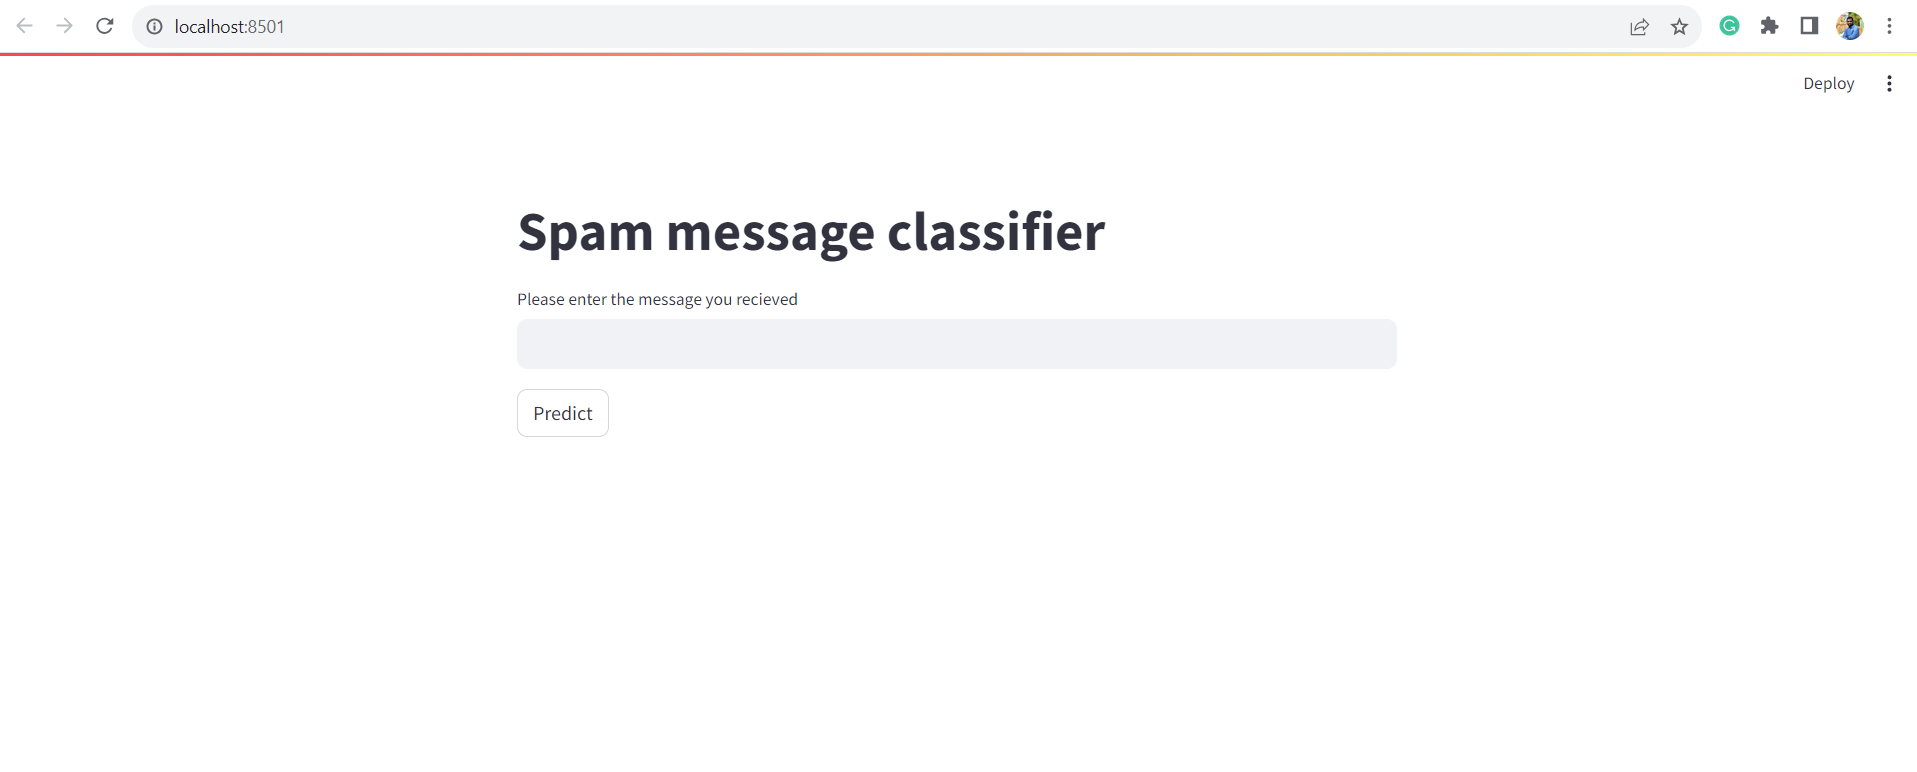

This is how webpage initially appears when you run app.py (streamlit run app.py)

Now we will take some examples and we will be testing them.

__Example 1:__

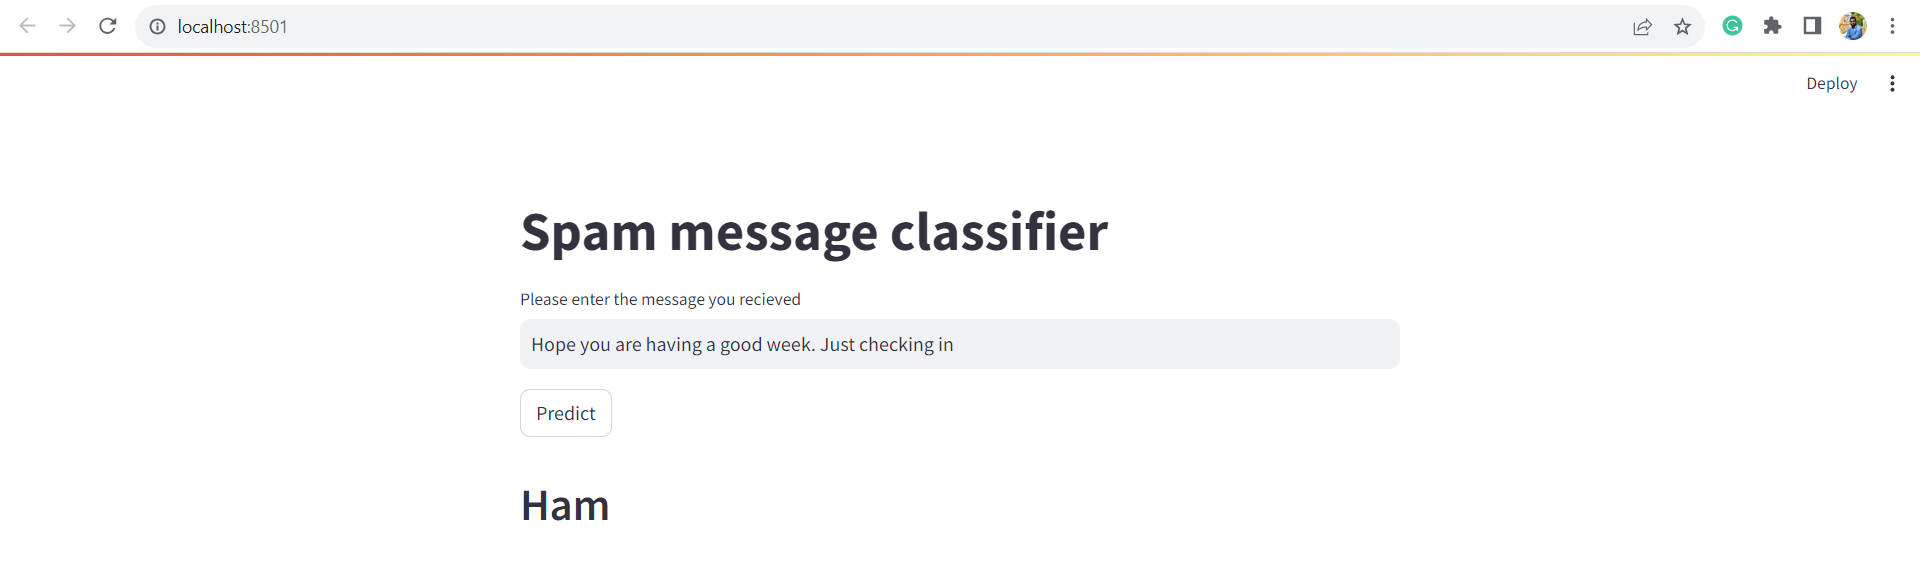

__Example 2:__

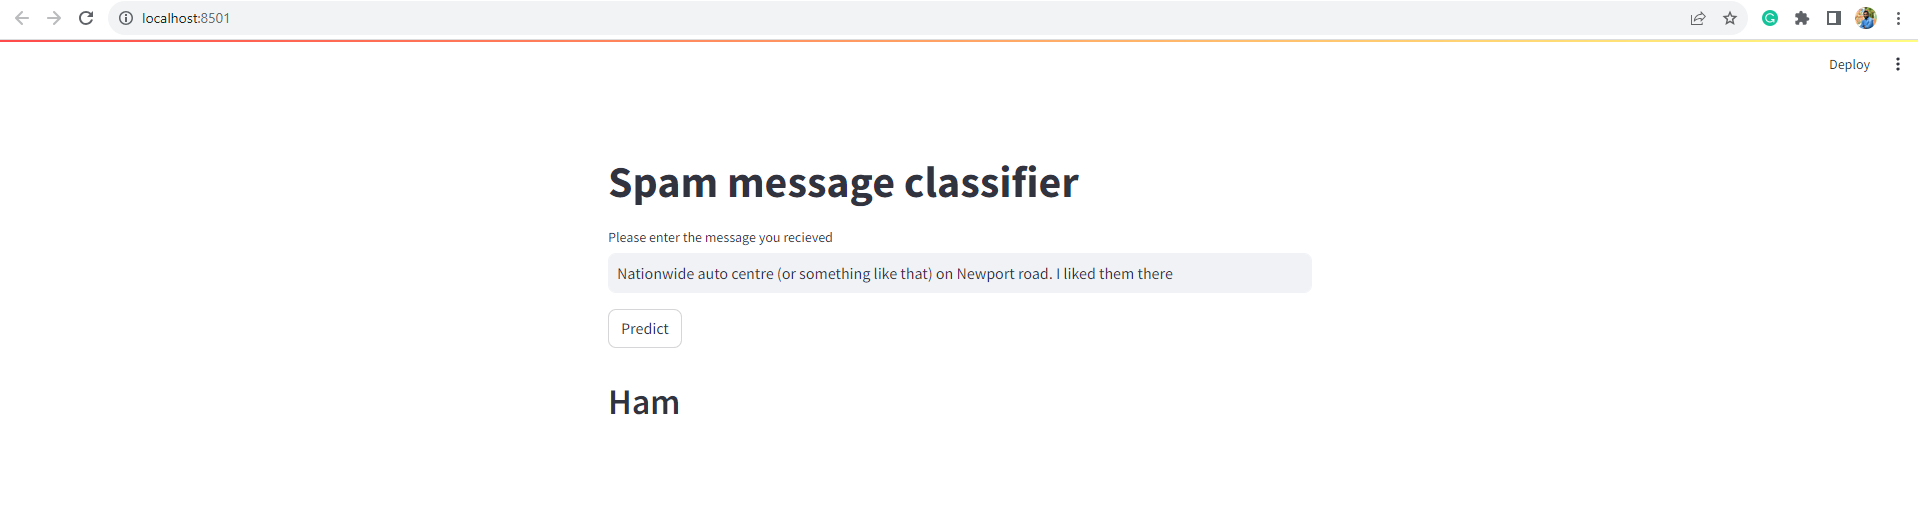

__Example 3:__

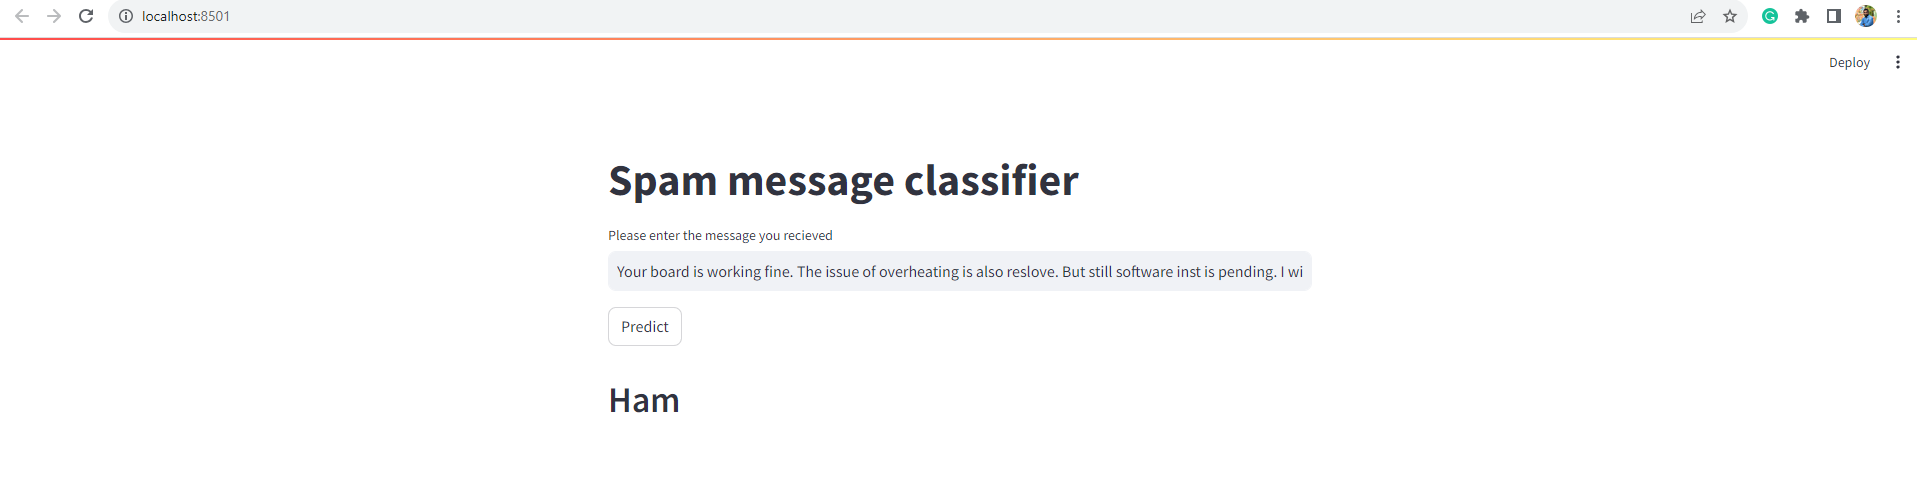

__Example 4:__

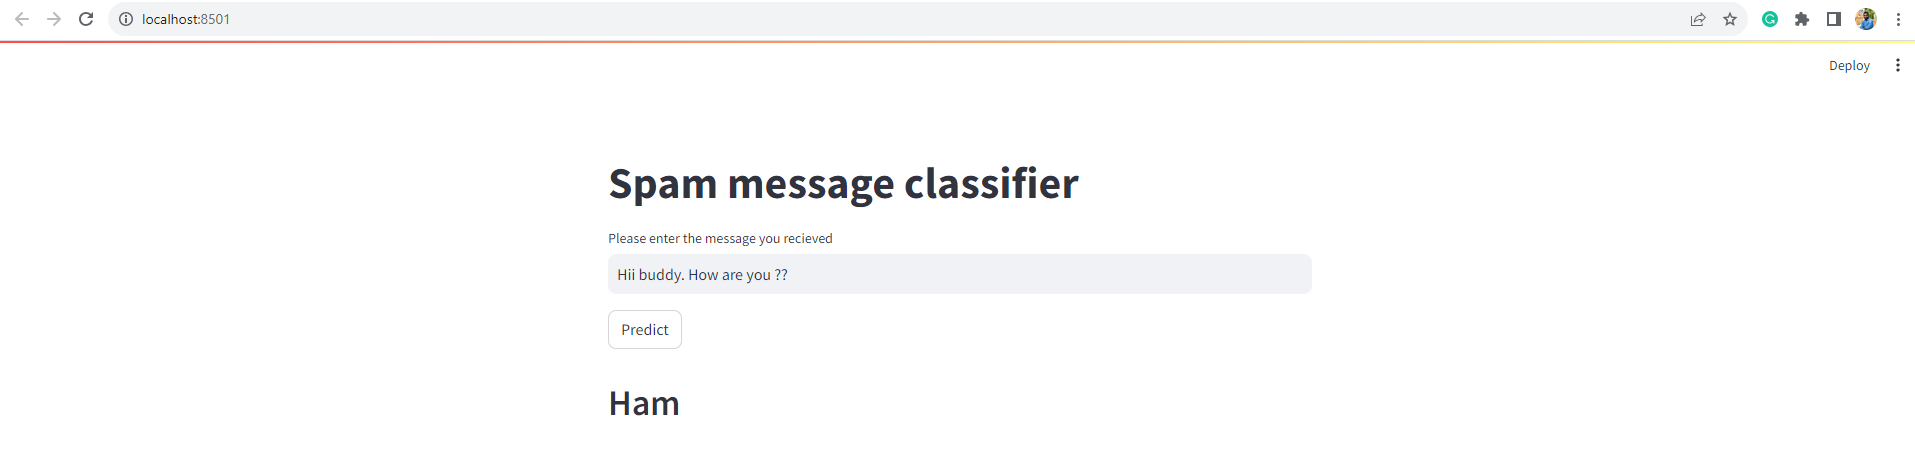

__Example 5:__

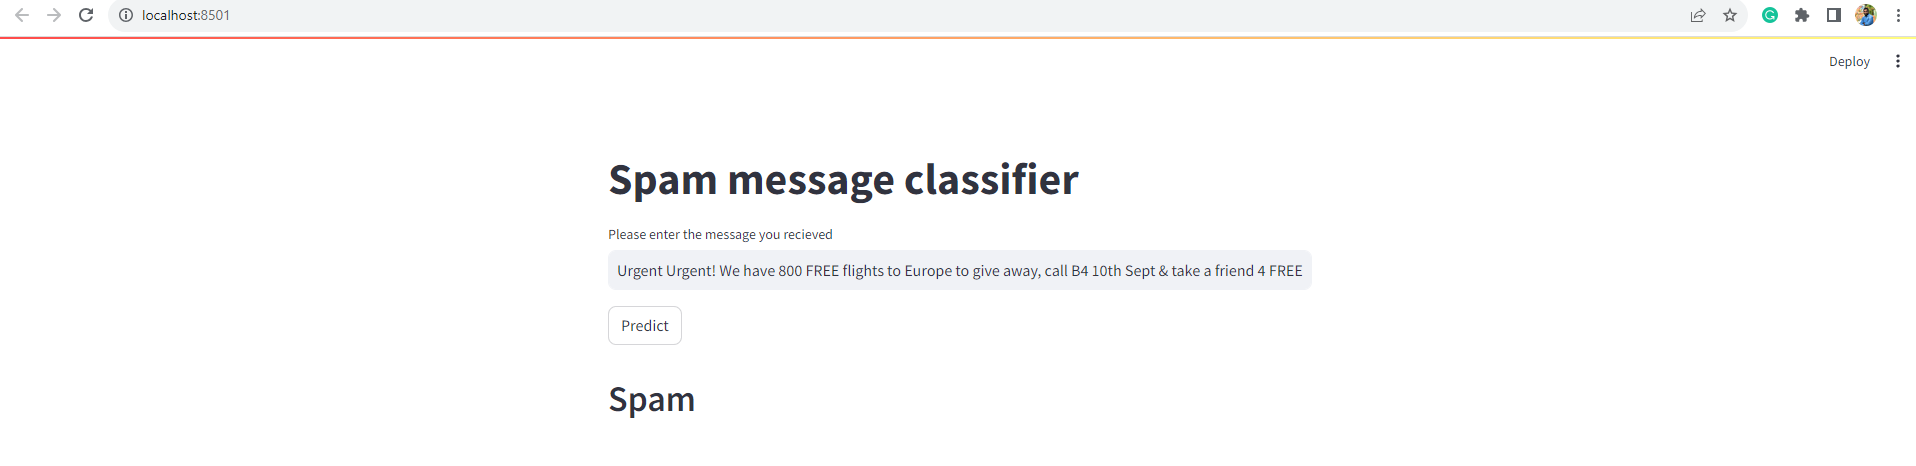

__Example 6:__

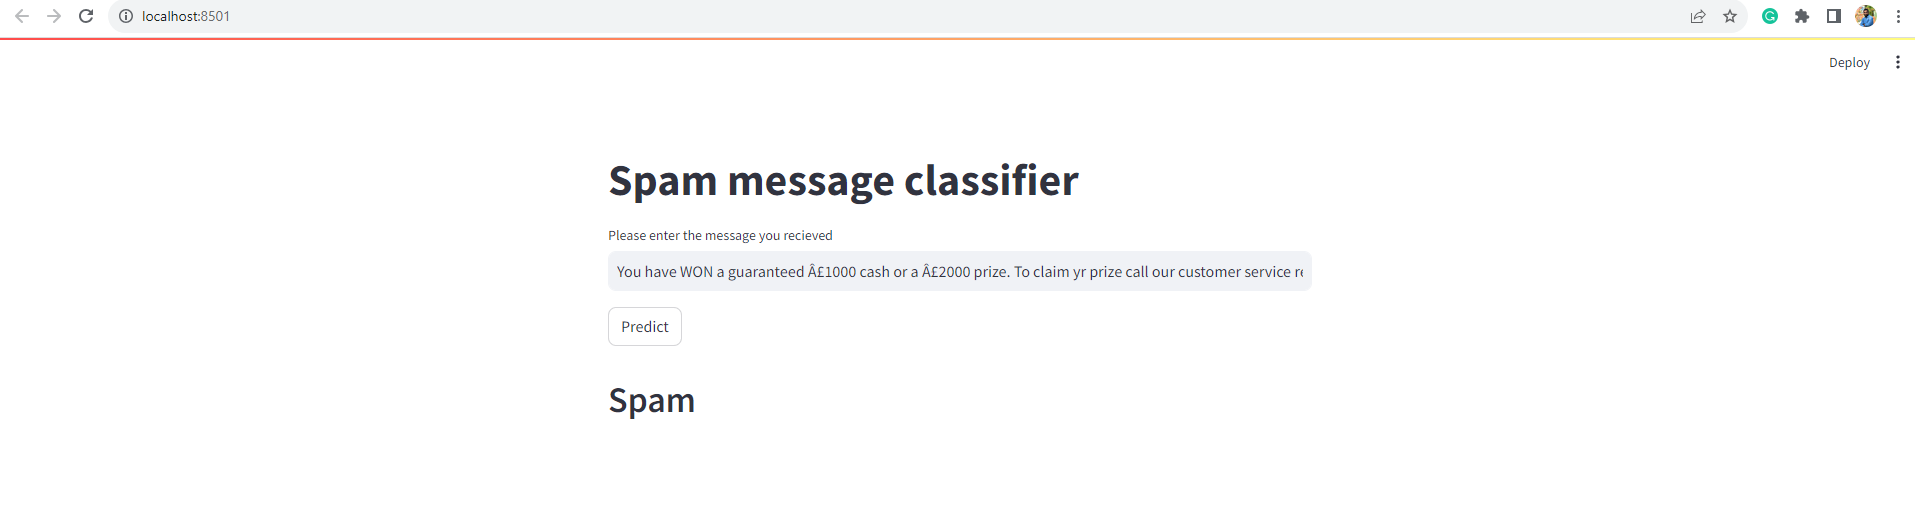

__Example 7:__

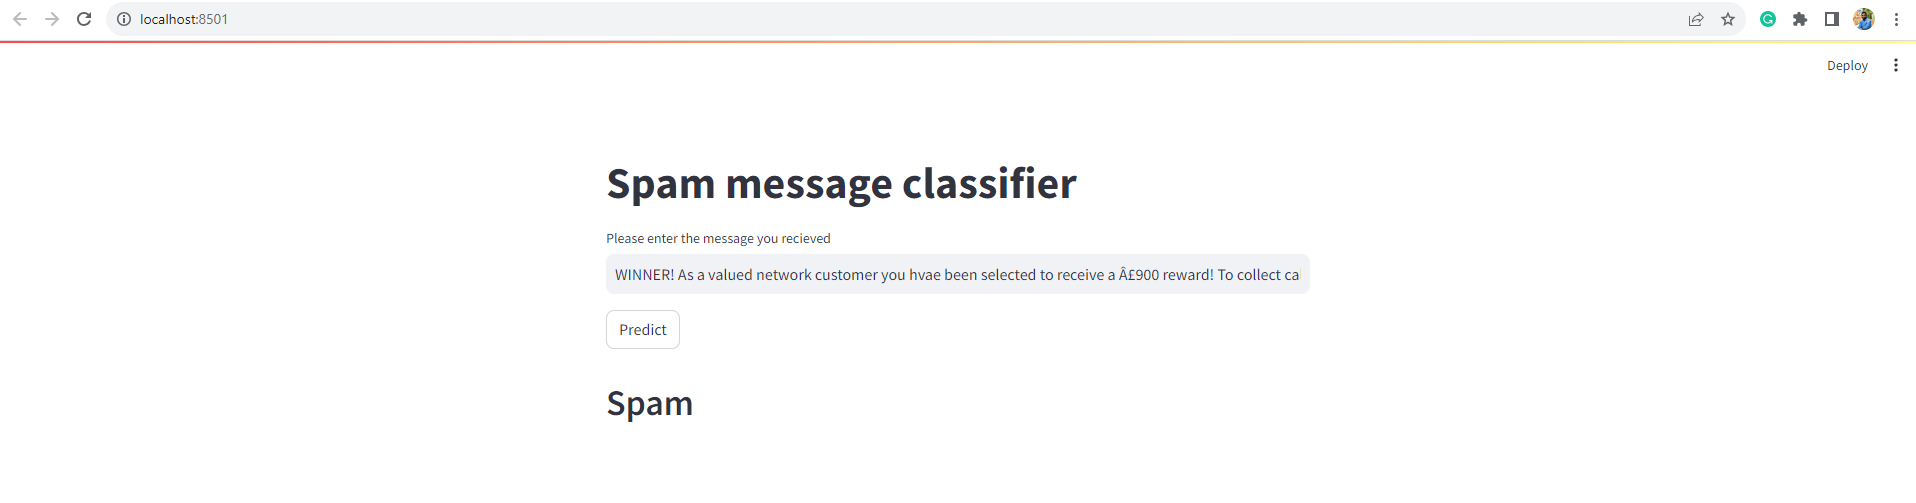

__Example 8:__

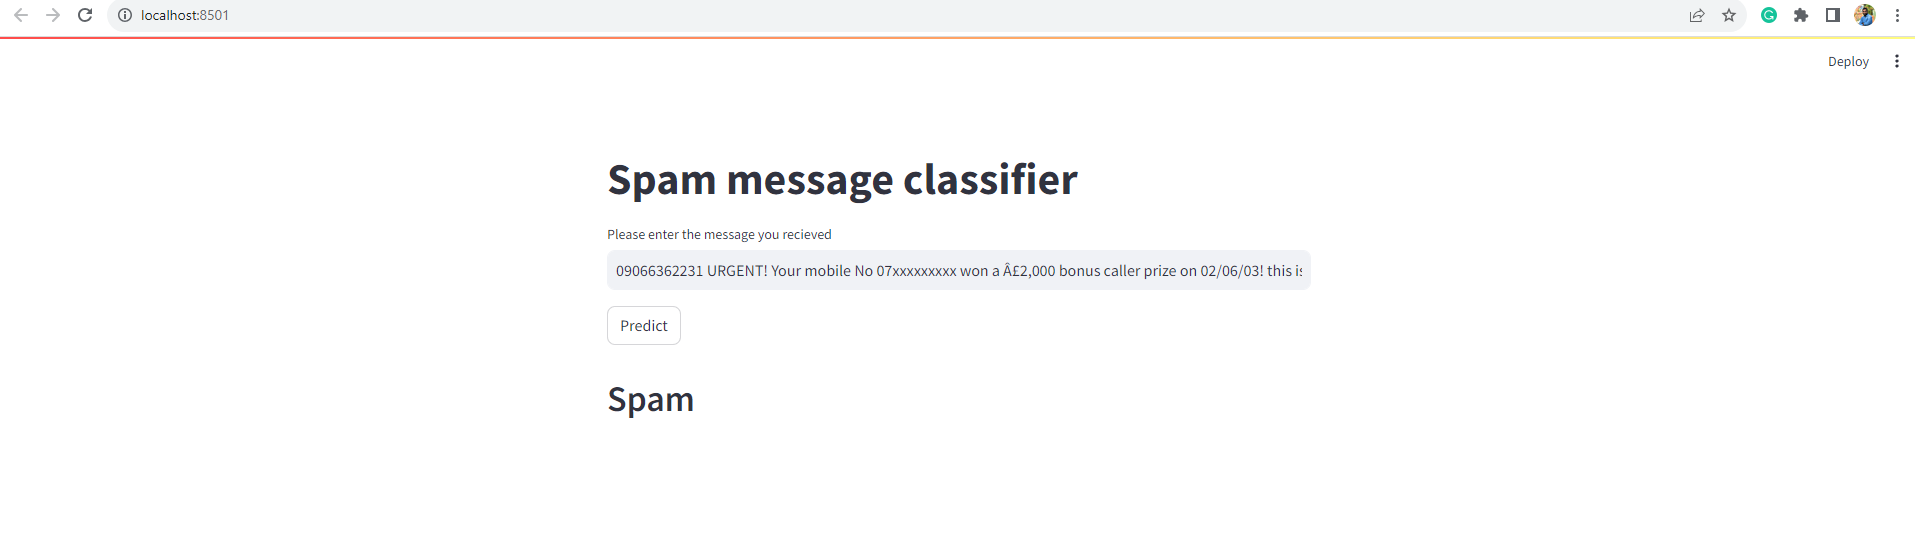

Above are some of the examples generated by the model deployed on the webpage.

## Conclusions

In this spam message classification project, we succeeded in developing an optimal model by experimenting with various classifiers and neural network architectures. However, with only ~5,100 rows of training data, model performance was constrained. Additional data would have enabled even better results. 

Nonetheless, this project gave useful experience in model development and hyperparameter optimization. We explored techniques like voting ensembles to combine multiple models. Tuning batch size, criterion, estimators and learning rate proved crucial for optimization. While some configurations caused job failures, these learnings will inform future work.  

Analyzing the data from multiple angles also provided value. Going forward, we will apply similar scrutiny to feature engineering and error analysis to continuously improve. The voting classifier approach shows particular promise for blending complementary models.

The unpredictable run times for some sophisticated models like neural networks posed challenges. In future projects, we will factor in greater headroom and computational resources.

In summary, despite data limitations, we delivered an effective classifier while leveling up skills in model tuning, ensembling, data analysis, and troubleshooting. With more data and compute power, even better performance is attainable. We are well positioned to apply these lessons to tackle more complex real-world prediction challenges.

### References

[1] https://www.kaggle.com/datasets/vivekchutke/spam-ham-sms-dataset

[2] https://numpy.org/doc/stable/index.html

[3] https://pandas.pydata.org/

[4] https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58

[5] https://matplotlib.org/

[6] https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

[7] https://seaborn.pydata.org/

[8] https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22

[9] https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/

[10] https://www.nltk.org/

[11] https://tartarus.org/martin/PorterStemmer/

[12] https://medium.com/mlearning-ai/wordclouds-with-python-c287887acc8b

[13] https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c

[14] https://en.wikipedia.org/wiki/Scikit-learn

[15] https://builtin.com/artificial-intelligence/gaussian-naive-bayes

[16] https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

[17] https://www.geeksforgeeks.org/bernoulli-naive-bayes/

[18] https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

[19] https://www.ibm.com/topics/logistic-regression

[20] https://xgboost.readthedocs.io/en/stable/

[21] https://scikit-learn.org/stable/modules/svm.html

[22]https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.

[23] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[24] https://scikit-learn.org/stable/modules/tree.html

[25] https://en.wikipedia.org/wiki/Gradient_boosting

[26] https://medium.com/@namanbhandari/extratreesclassifier-8e7fc0502c7

[27] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

[28] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

[29] https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/

[30] https://www.geeksforgeeks.org/understanding-python-pickling-example/

[31] https://pypi.org/project/streamlit/

In [224]:
import io
import nbformat
import glob
nbfile = glob.glob('Final_report.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file Final_report.ipynb is 6140
